In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.table as tab
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
sigma_analytics = 'drive/MyDrive/Colab Notebooks/sigma-analytics/'
conn = sqlite3.connect(sigma_analytics+'F-Score_Top_100_100_50-2021.db')

In [23]:
def currency(x, pos):
  """convert raw currency to crores format"""
  if x >= 1e7:
      s = '{:1.1f}cr'.format(x*1e-7)
  elif x >= 1e6:
      s = '{:1.2f}cr'.format(x*1e-7)
  else:
      s = '{:1.2f}cr'.format(x*1e-6)
  return s

def style():
  plt.style.use('fivethirtyeight')
  plt.rcParams.update({'figure.autolayout': True})

def barh(x, y, l, s):
  """plots given x, y in bar chart and table contain details"""
  fig, ax = plt.subplots(figsize=s)
  fig.tight_layout(pad=4)
  # fig.suptitle("Smallcap Stocks", va="bottom")
  # plot horizontal bar graph
  ax.barh(x, y, 0.4)
  labels = ax.get_xticklabels()
  plt.setp(labels, rotation=45, horizontalalignment='right')
  # set labels
  ax.set(xlabel=l["x"], ylabel=l["y"], title=l["t"])

  # Add a vertical line, here we set the style in the function call
  ax.axvline(np.mean(y), ls='--', color='y', label=f"mean {np.mean(y)}")
  ax.axvline(2, ls='--', color='r', label="2 = low f-score")
  ax.axvline(9, ls='--', color='g', label="9 = good f-score")
  ax.legend()
  # Annotate market cap for each bar
  for p in ax.patches:
      ax.annotate(f"{p.get_width()}pts", xy=(p.get_width()+0.12, p.get_y()+0.15))

def table(df):
  df["Market Capital"] = [currency(x=a, pos=None) for a in df["Market Capital"]]
  #hide the axes
  fig, ax = plt.subplots(figsize=(12, (len(df.values)/2)-5))
  fig.tight_layout(pad=4)
  ax.axis('off')
  ax.axis('tight')
  ax.set(title="Ticker Details")
  #create table
  table = tab.table(ax, cellText=df.values, colLabels=df.columns, loc='center',
            cellLoc="center", colColours=["orange"]*len(df.columns))
  table.auto_set_font_size(False)
  table.set_fontsize(11)
  table.scale(0, 2)
  table.auto_set_column_width(col=list(range(len(df.columns))))
  ax.add_table(table)
  
def save(filename):
  pp = PdfPages(filename)
  fig_nums = plt.get_fignums()
  figs = [plt.figure(n) for n in fig_nums]
  for fig in figs:
      fig.savefig(pp, format='pdf')
  pp.close()

def get_sector_wise_f_score(df):
  output = {}
  grouped = df.groupby('Sector')
  for name, group in grouped:
    output[name] = group
  return output

def process(df, filename):
  # prepare style
  style()

  # plots f-score
  sectors_f_score = get_sector_wise_f_score(df=df)
  for name in sectors_f_score:
    y = list(sectors_f_score[name]['Ticker'])
    barh(y, list(sectors_f_score[name]['Piotroski F-score']),
        {"x":"Piotroski F-score", "y":"Ticker", "t":f"f-score for tickers in {name} sector"},
        (25, len(y)+(len(y)/2+2)))

  # plot details in table
  table(df)

  # save all figure into single pdf
  save(filename)

In [24]:
sql = '''select * from all_cap'''
adf = pd.read_sql(sql, conn)

In [25]:
sql = '''select * from large_cap'''
ldf = pd.read_sql(sql, conn)

In [26]:
sql = '''select * from mid_cap'''
mdf = pd.read_sql(sql, conn)

In [27]:
sql = '''select * from small_cap'''
sdf = pd.read_sql(sql, conn)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)


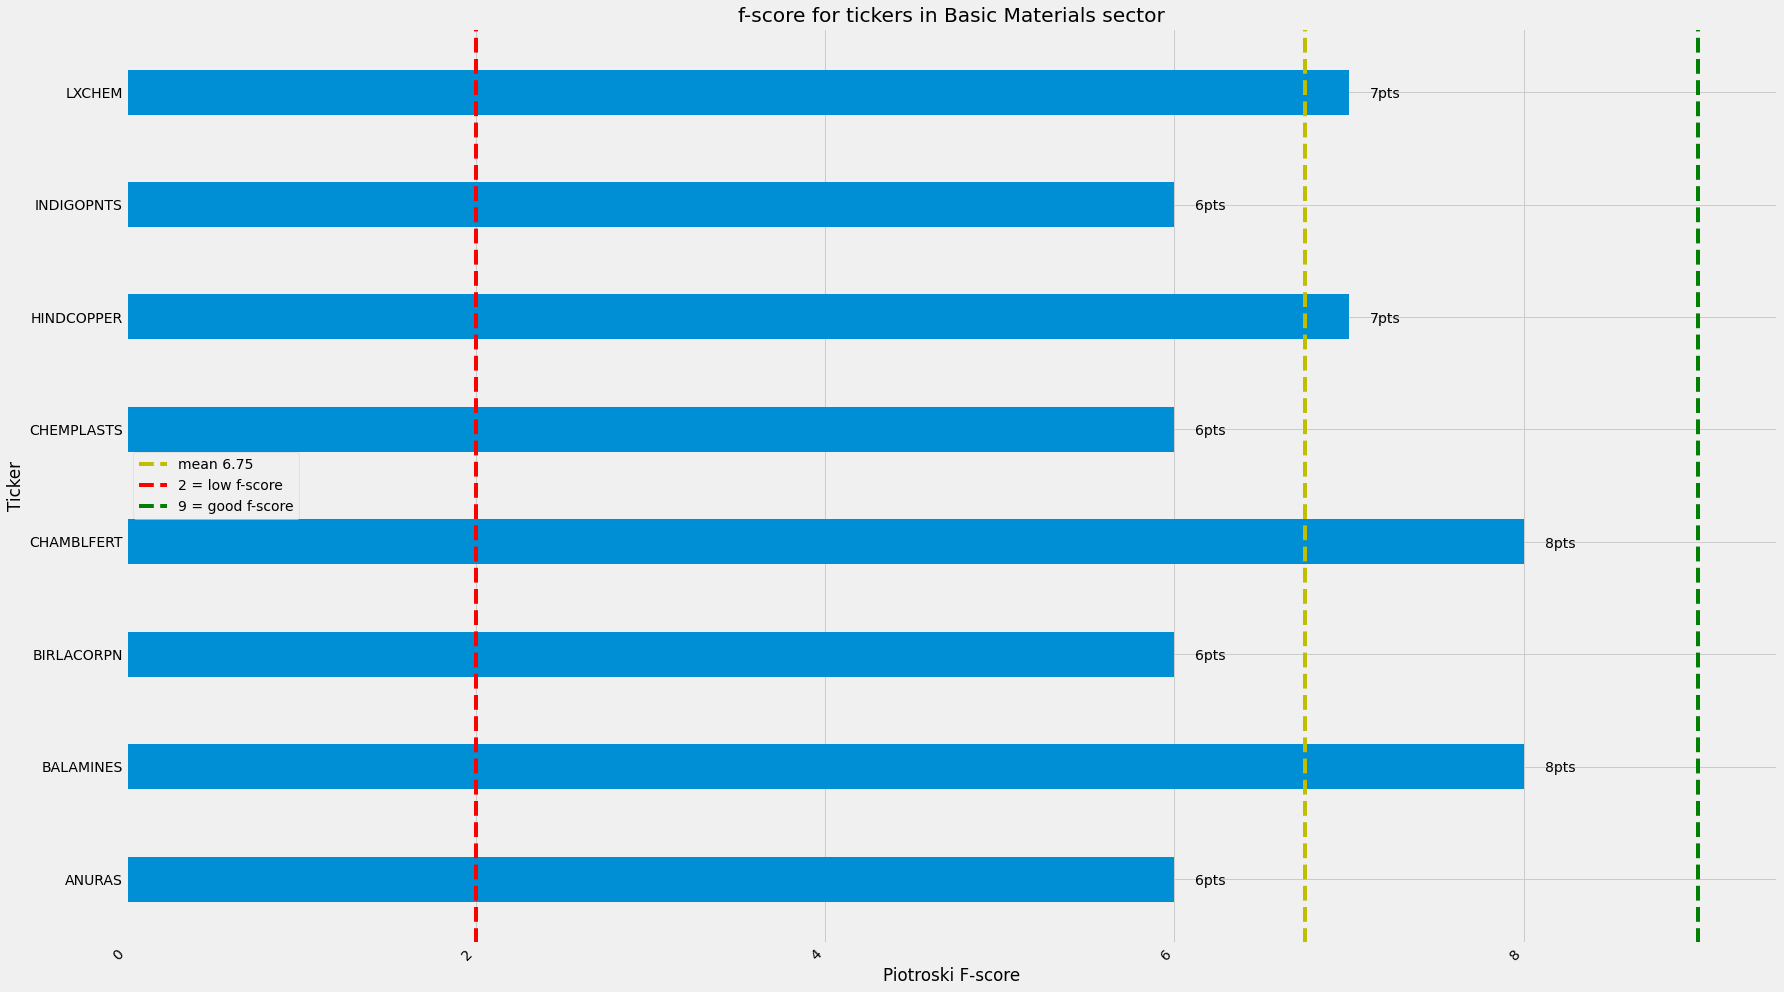

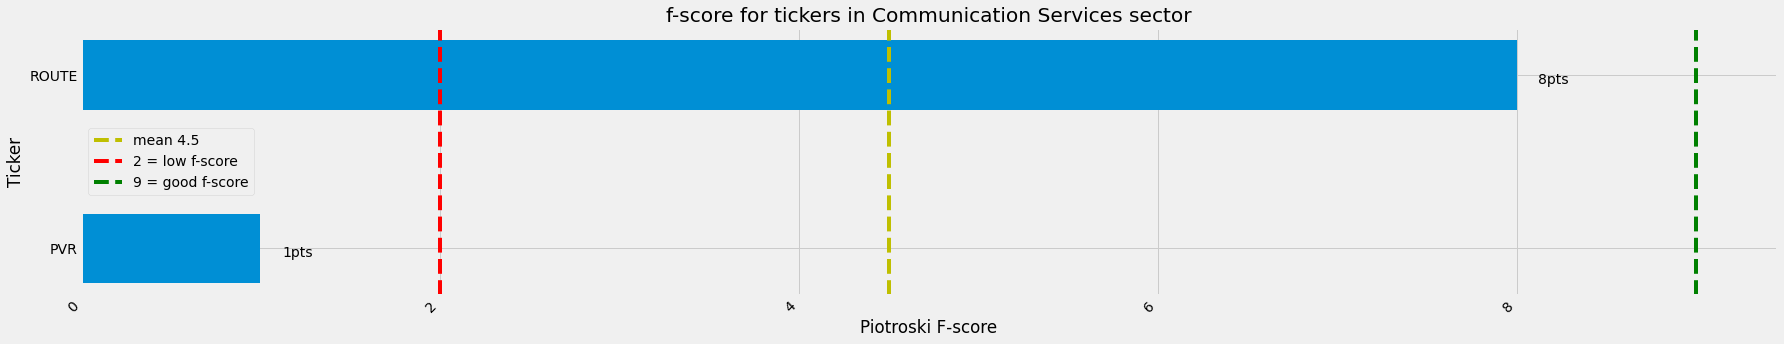

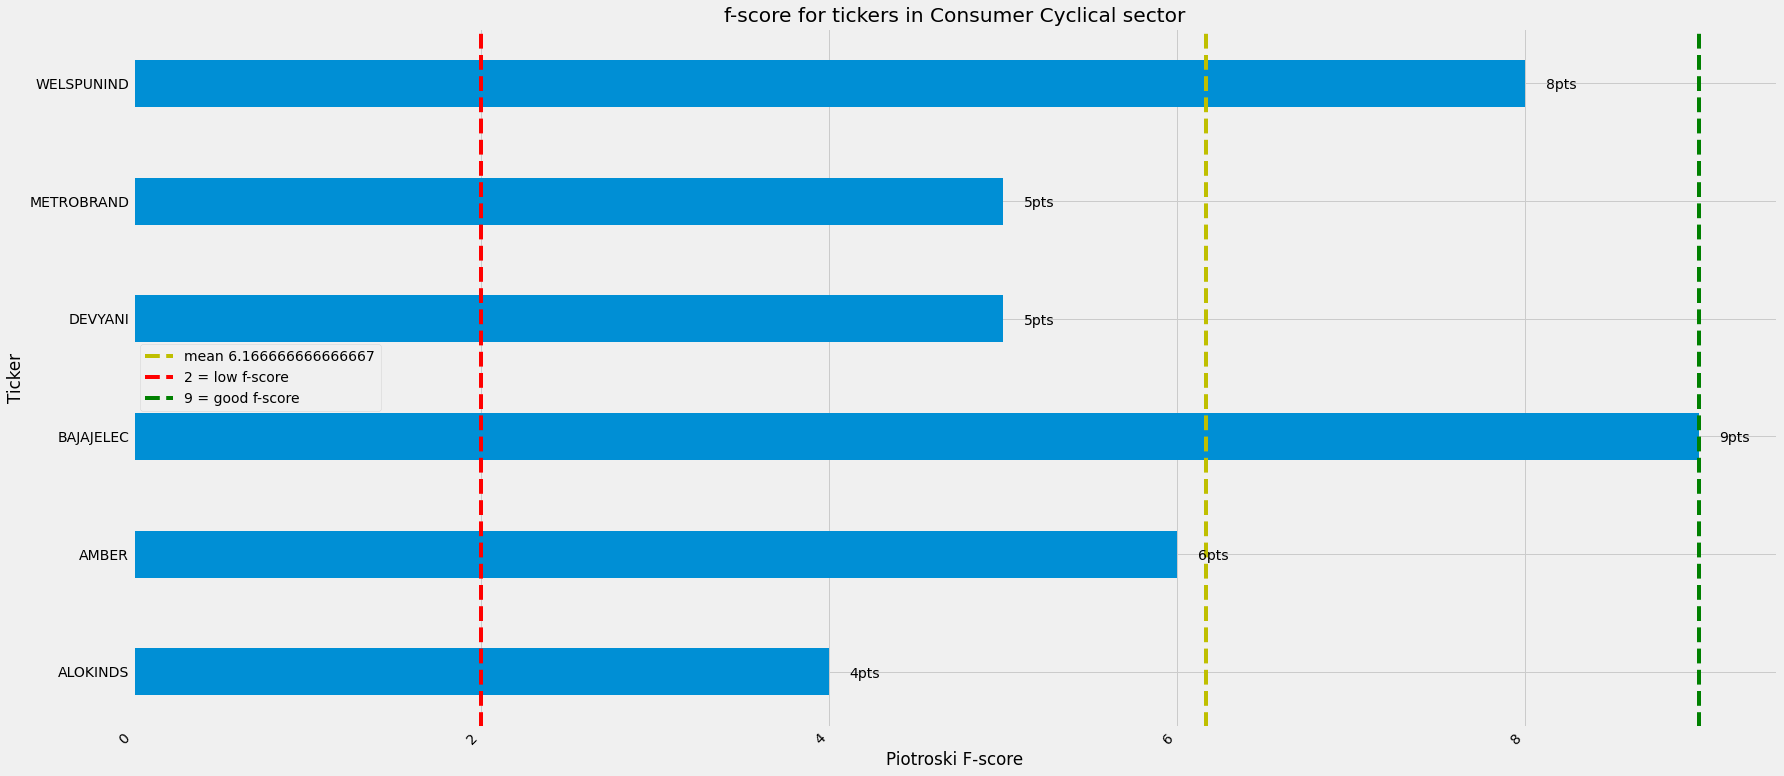

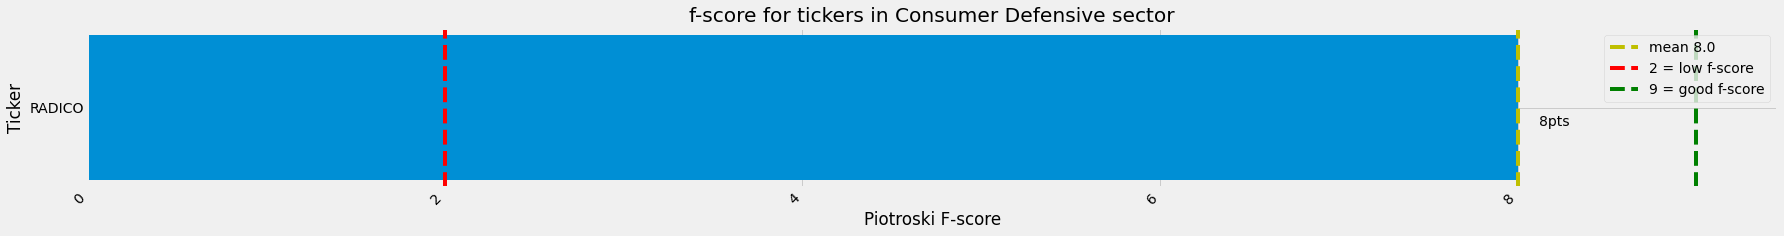

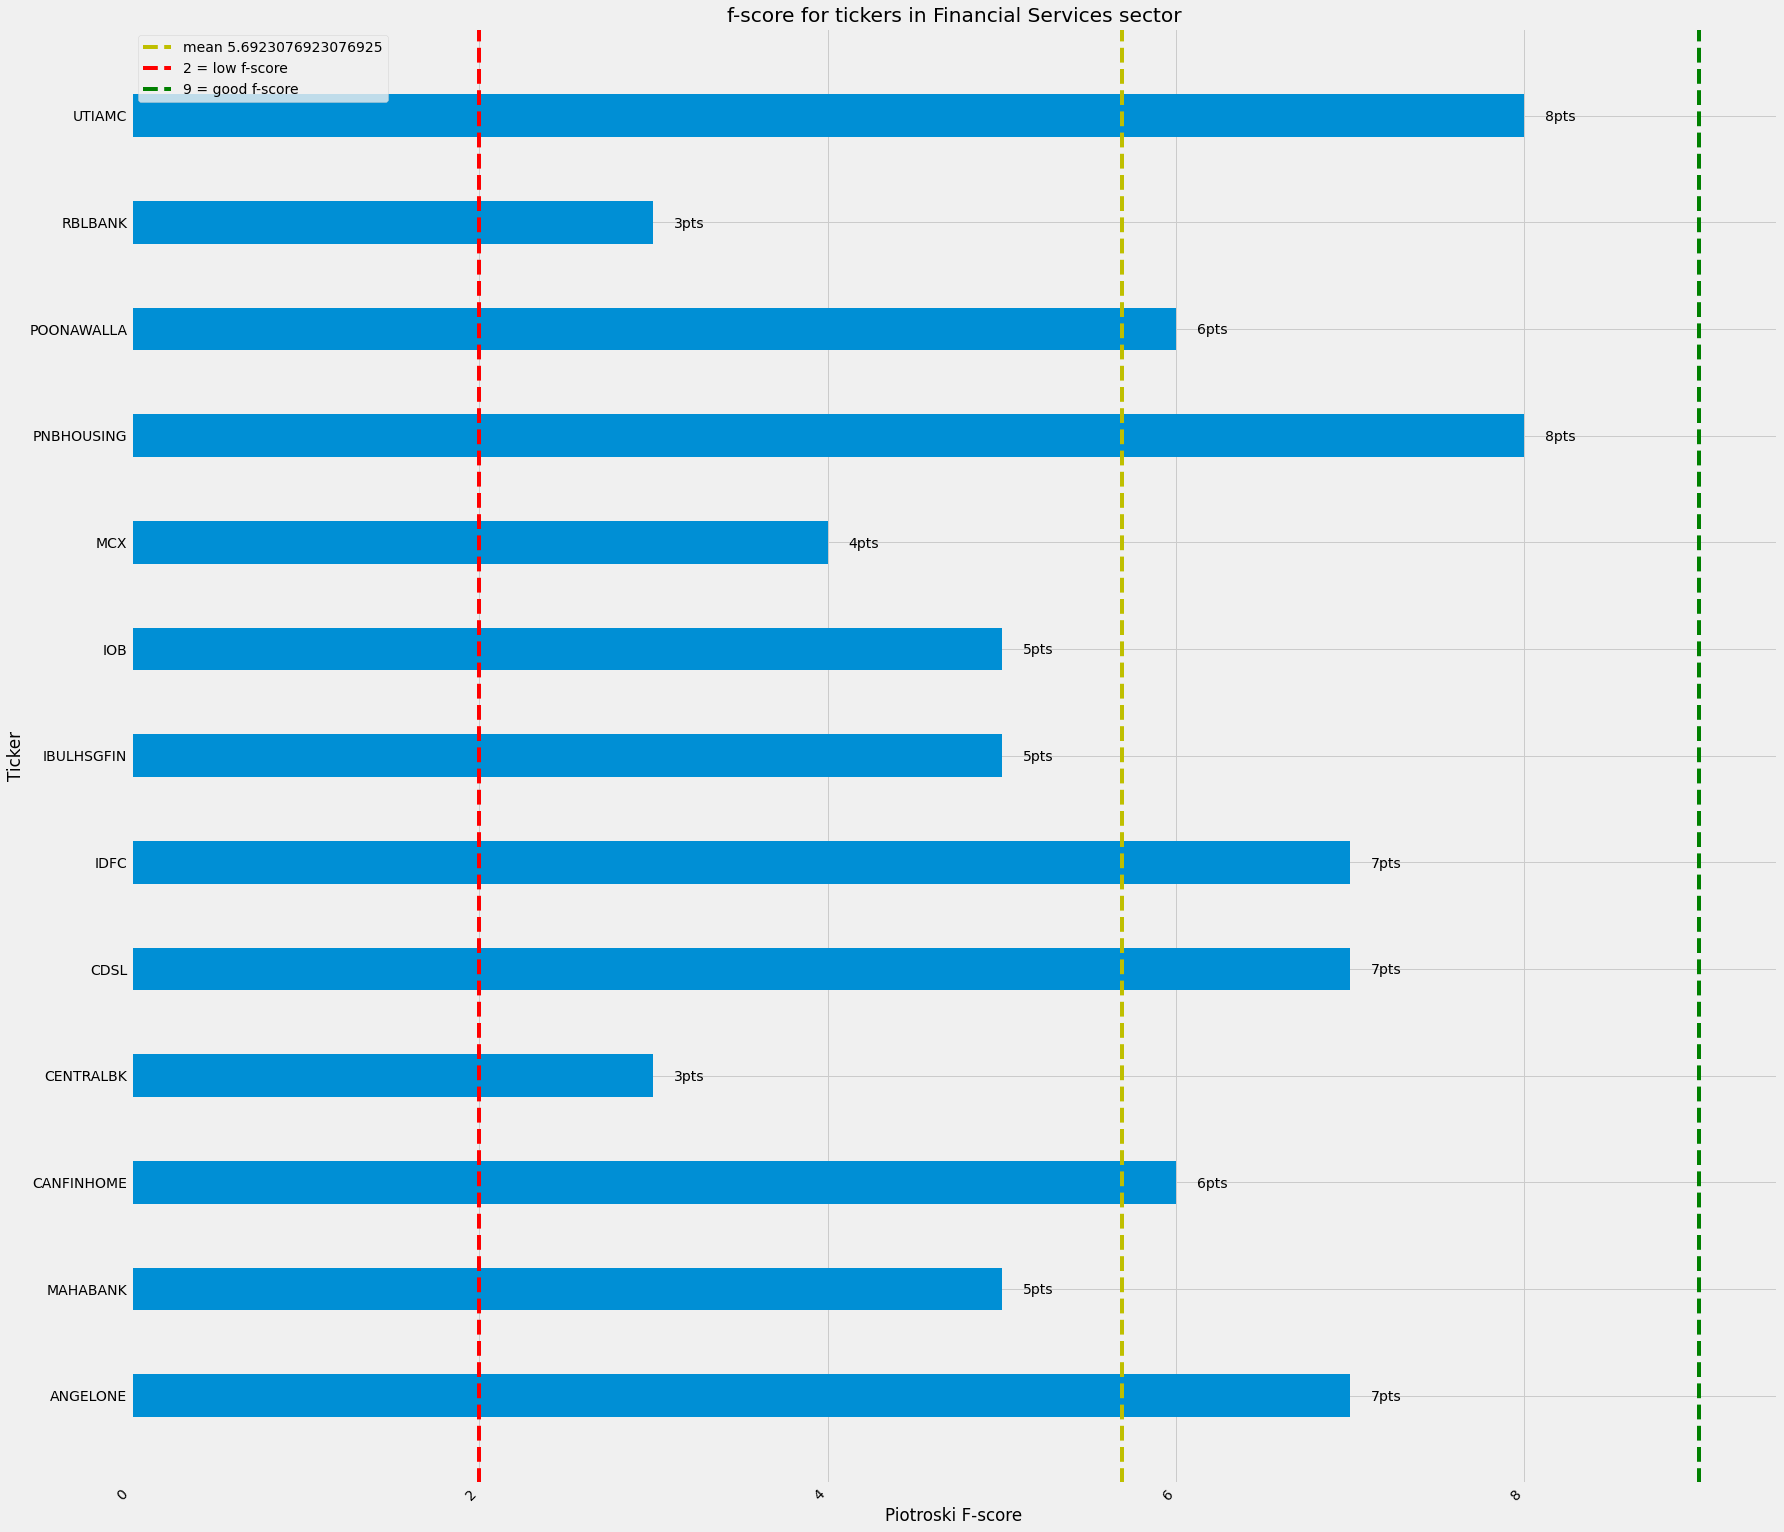

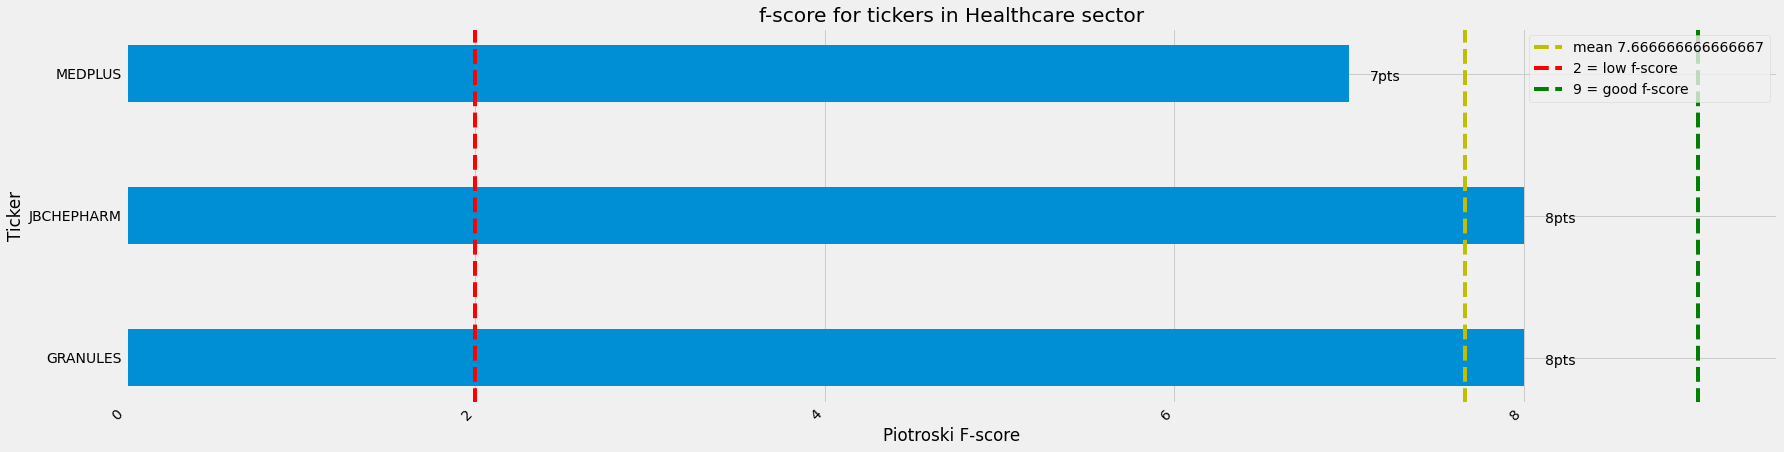

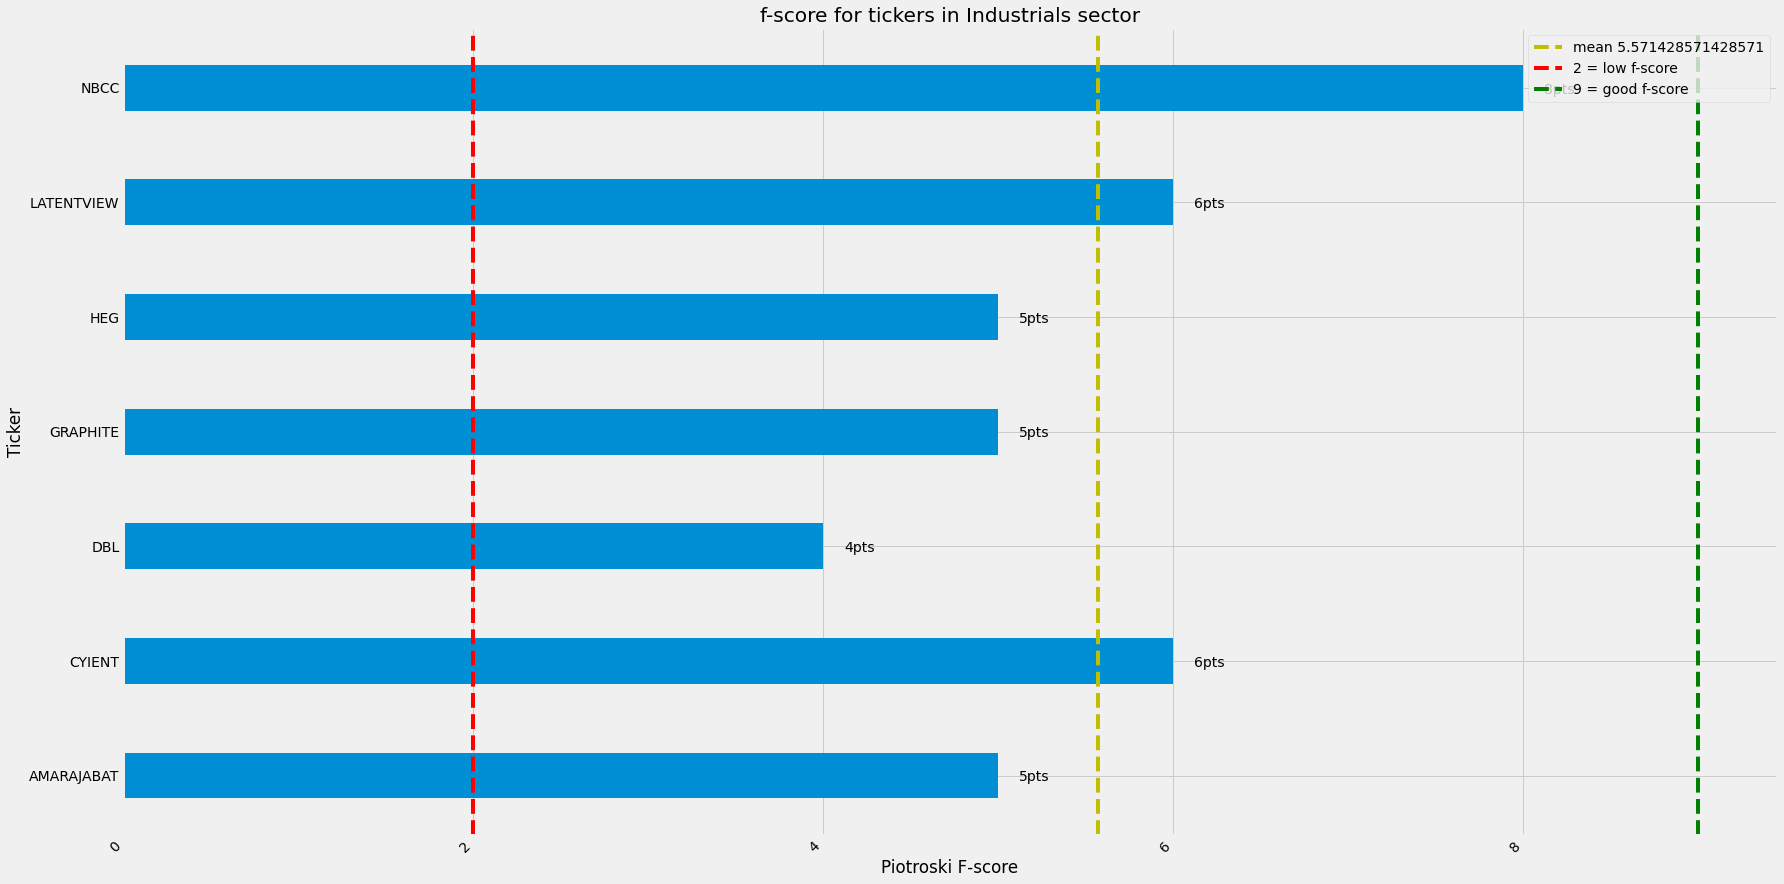

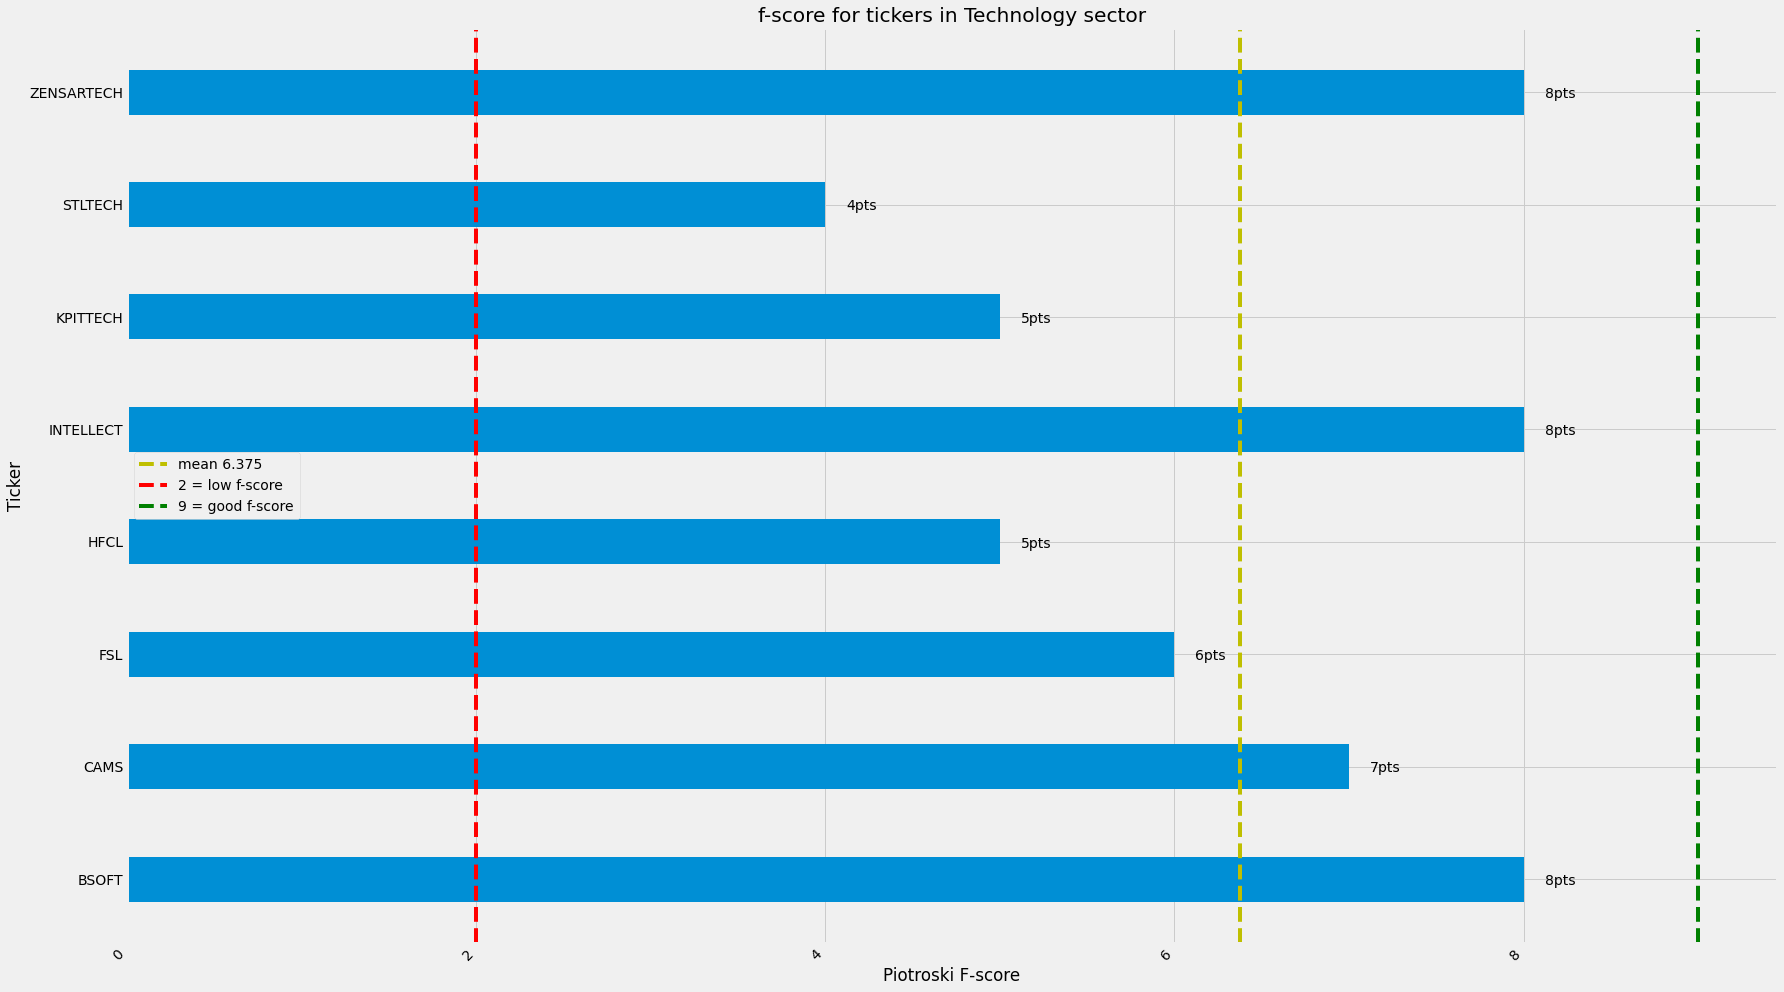

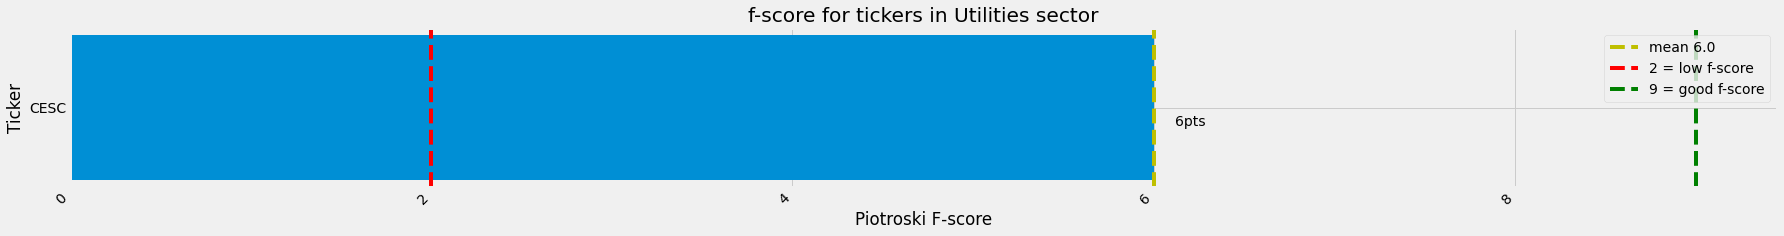

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


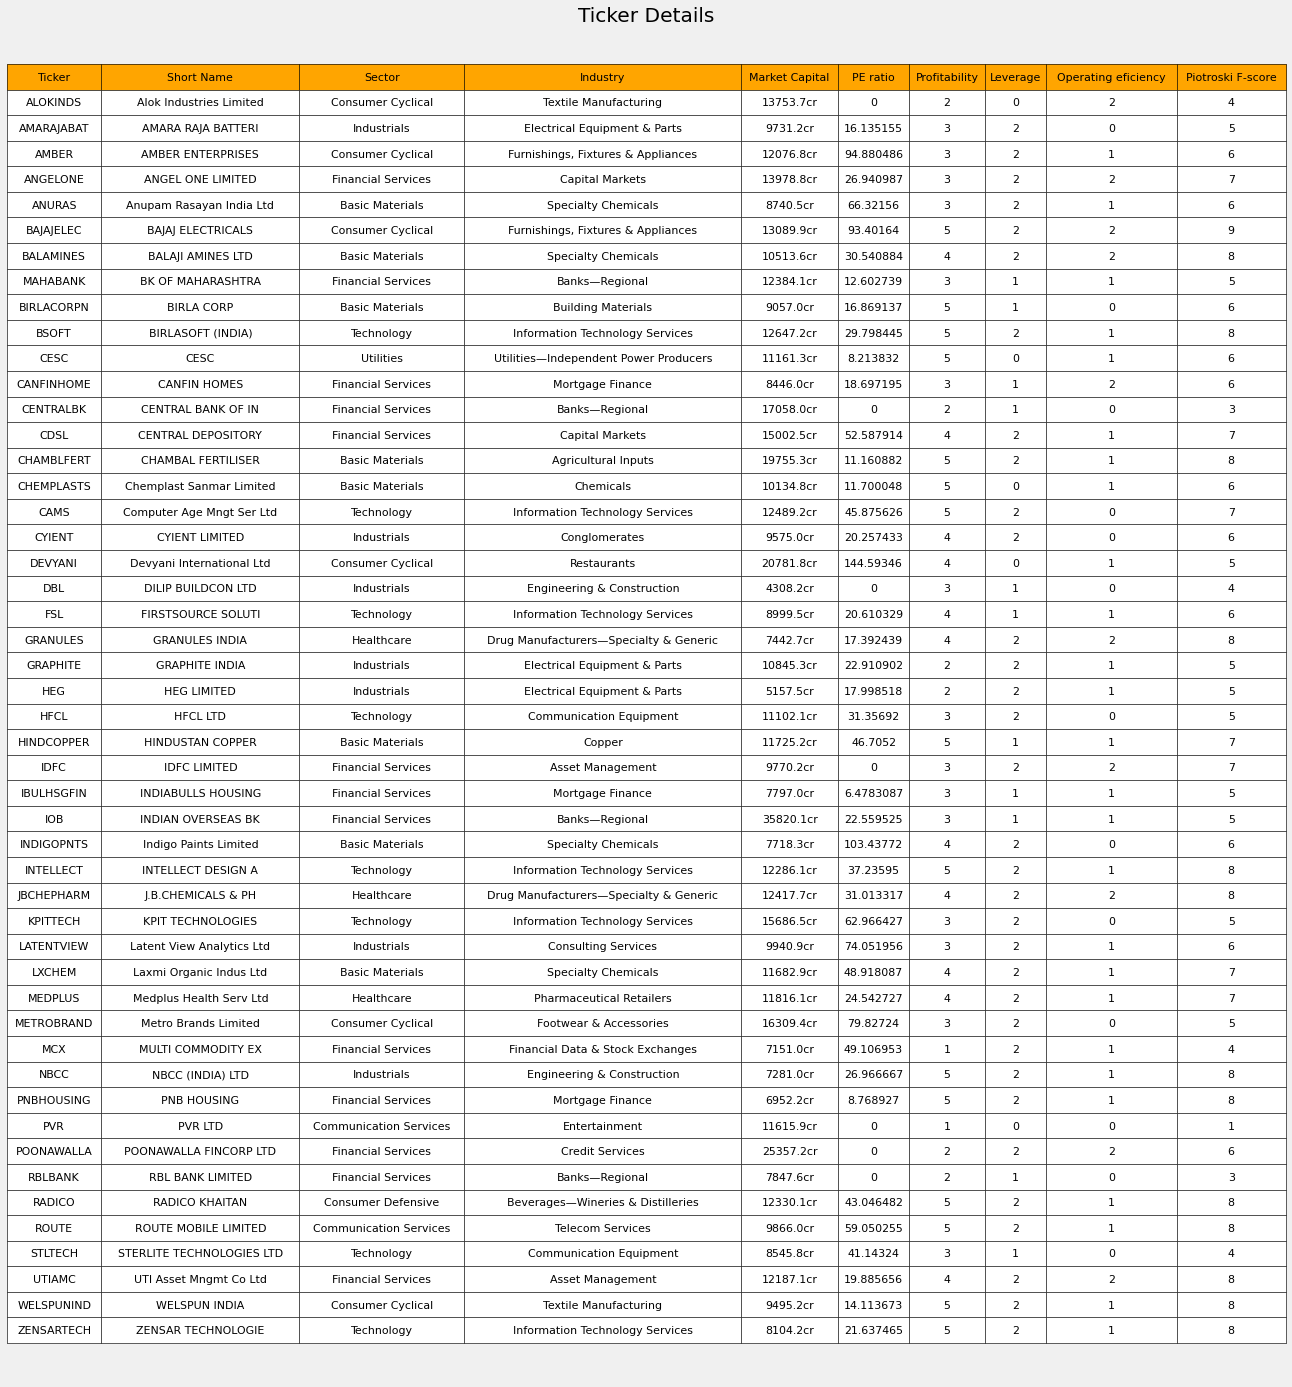

In [28]:
process(df=sdf, filename="small_cap.pdf")

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)


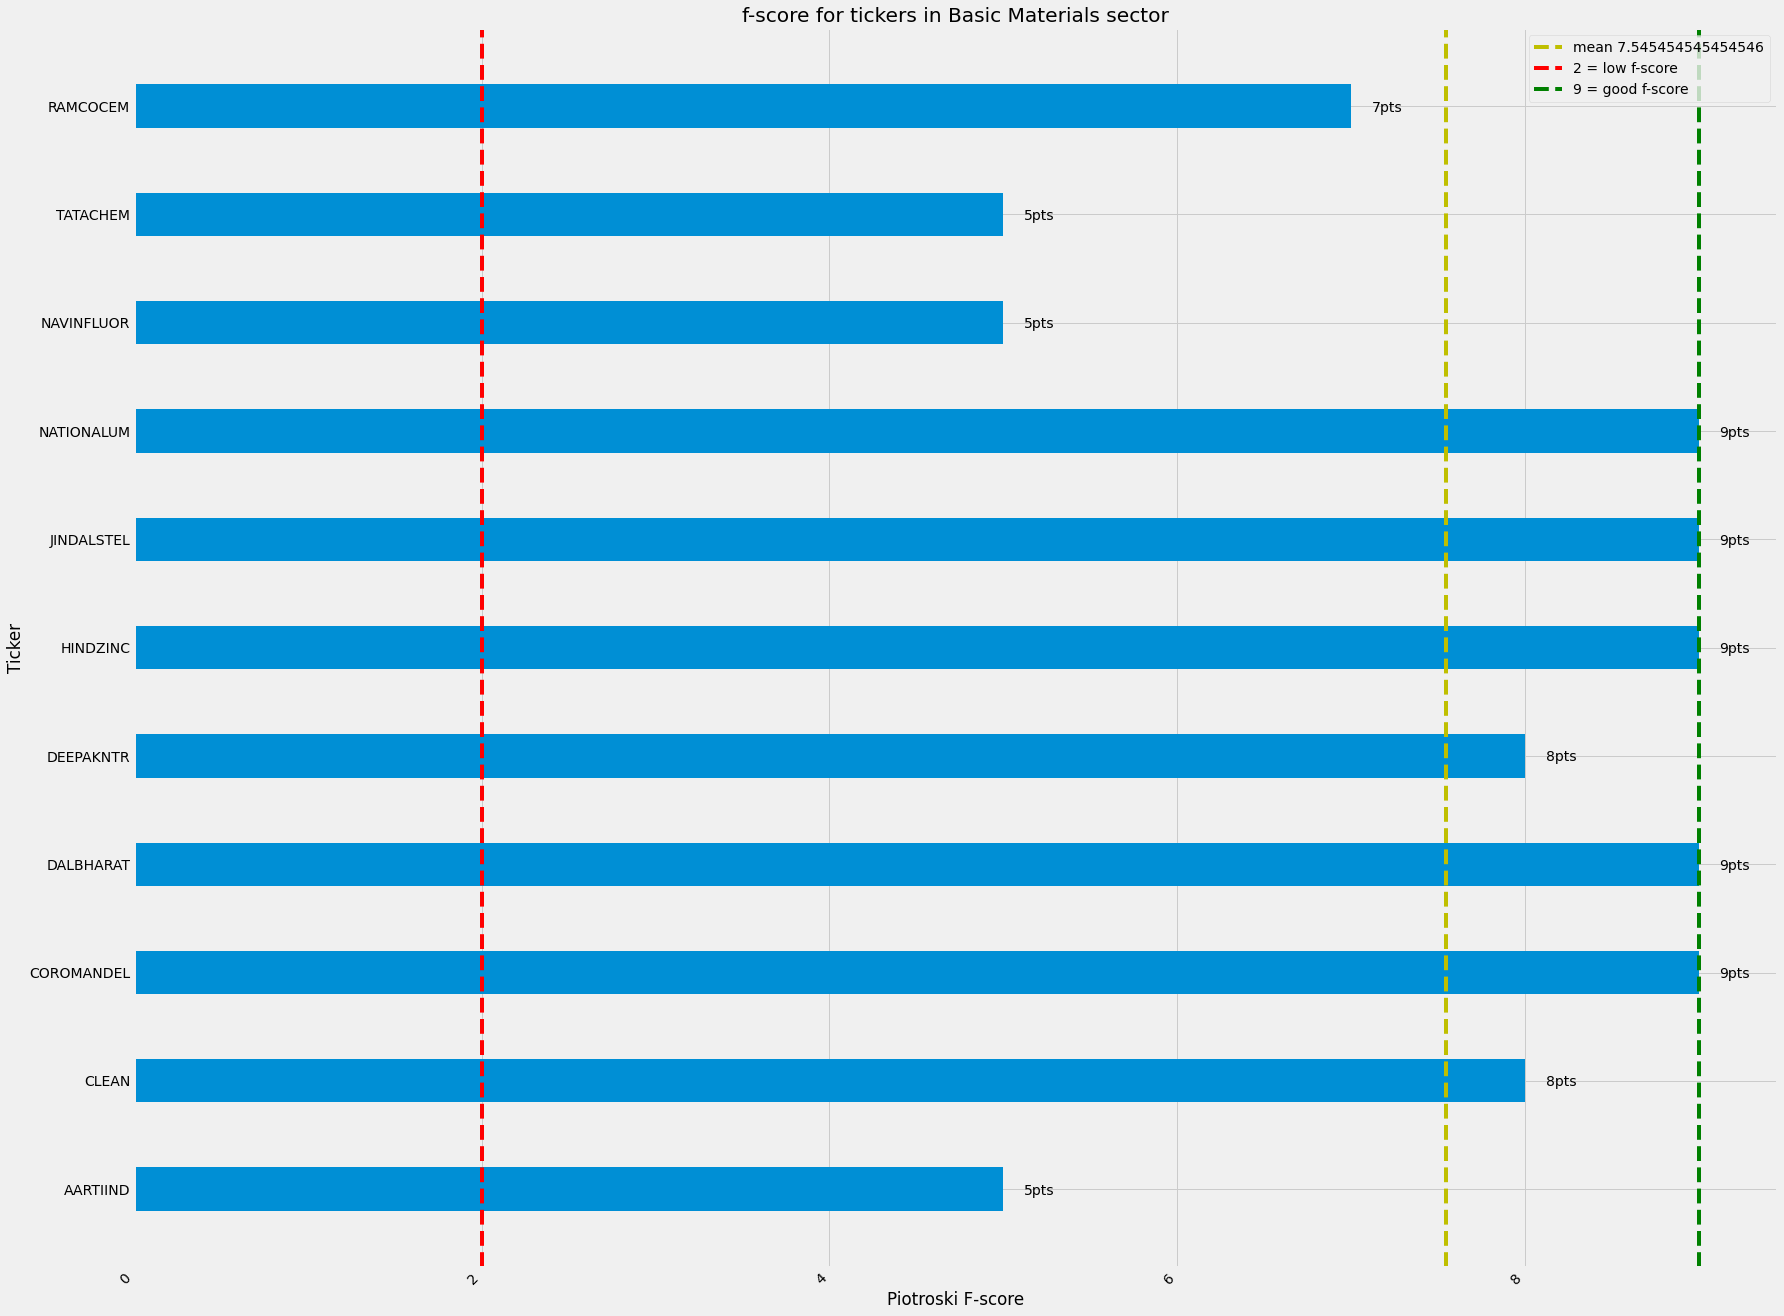

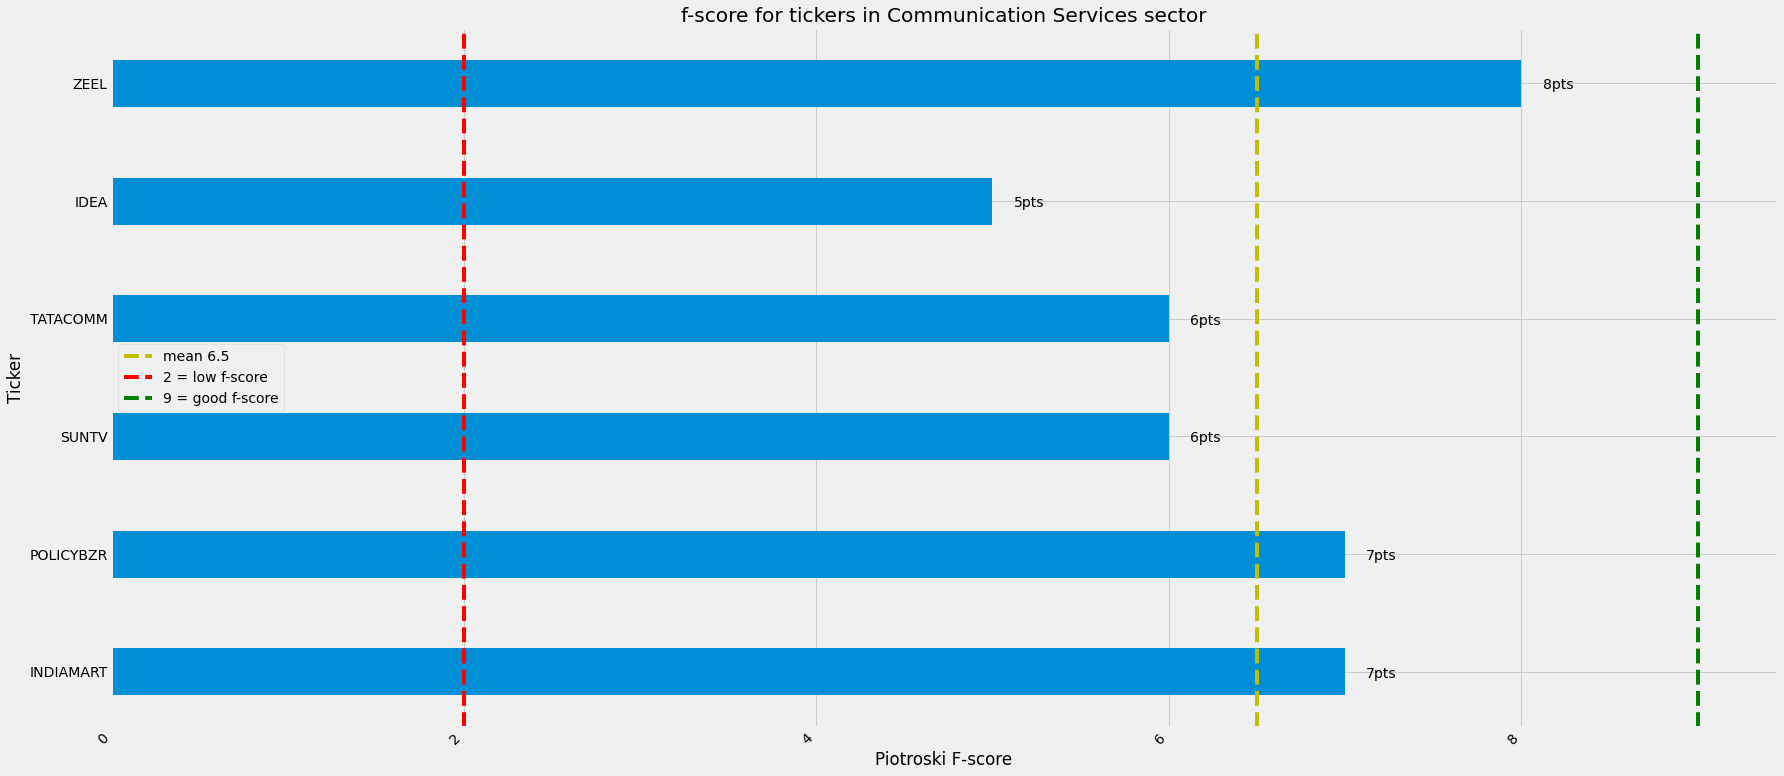

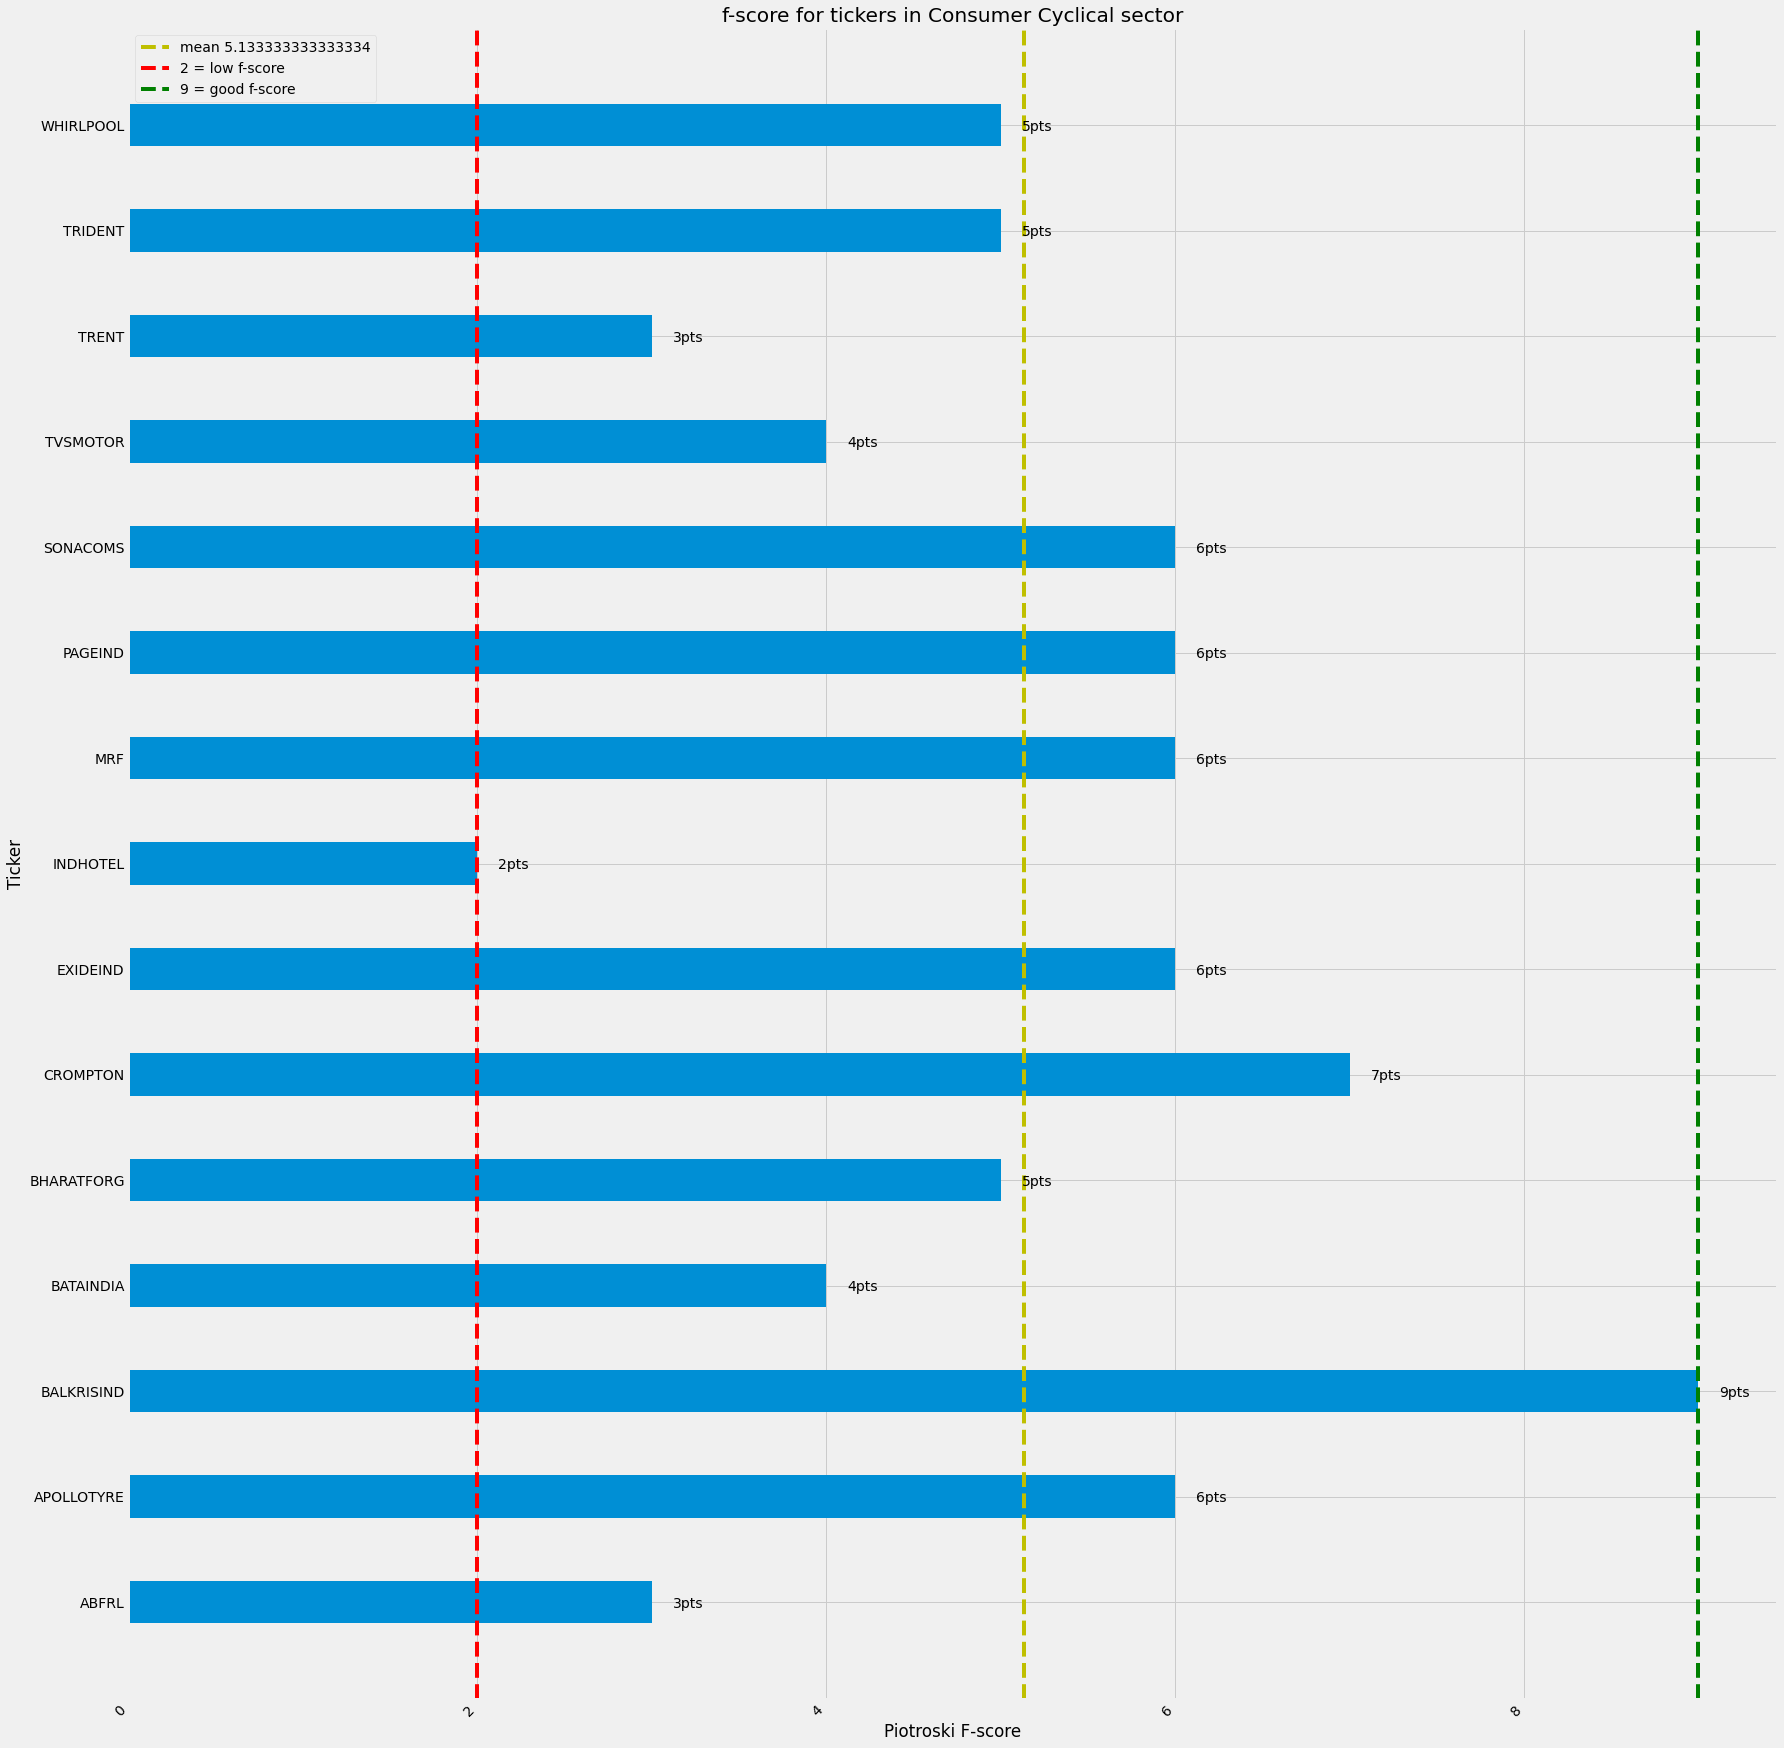

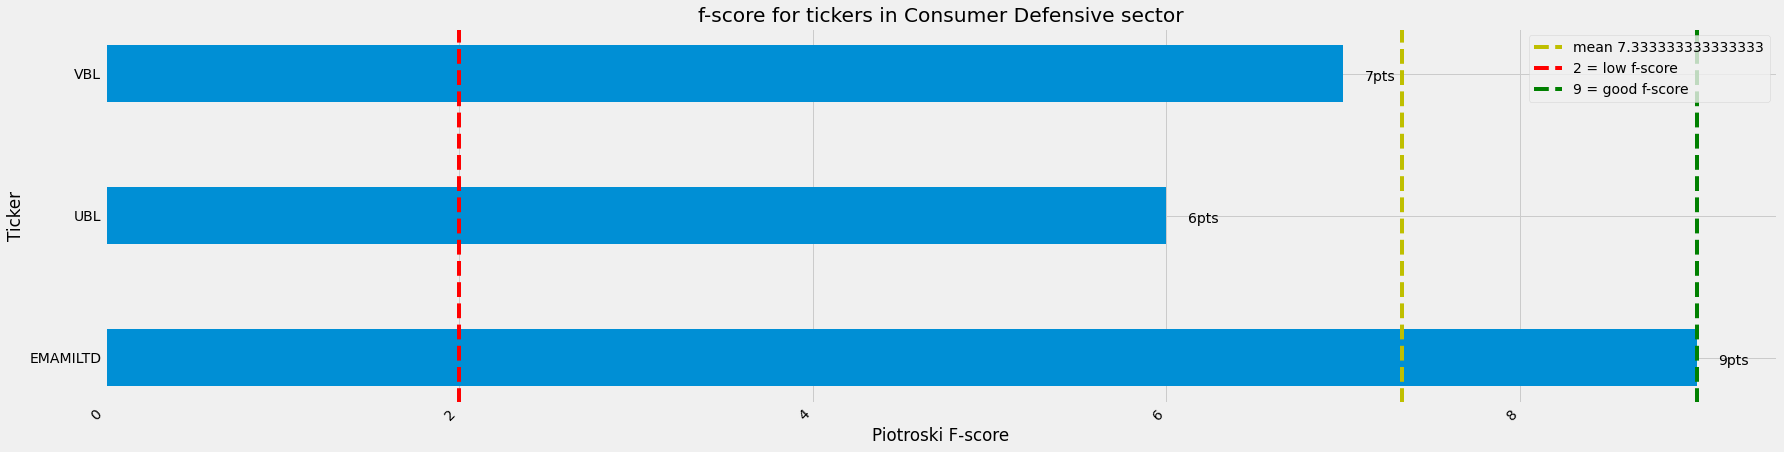

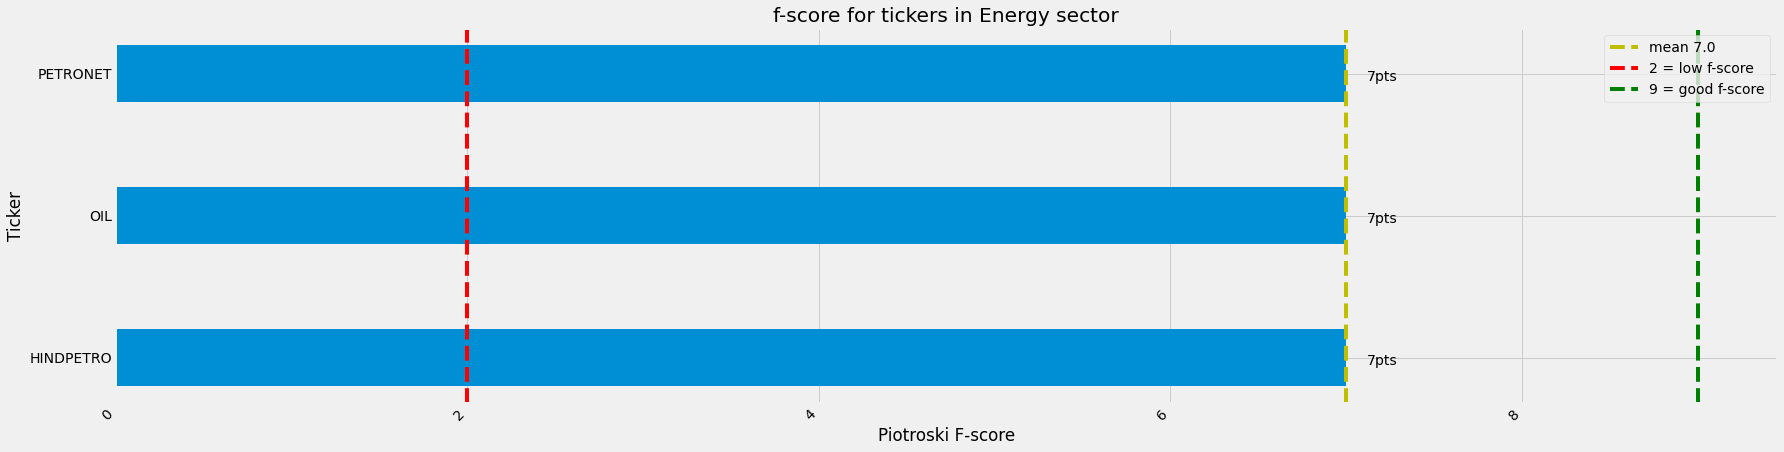

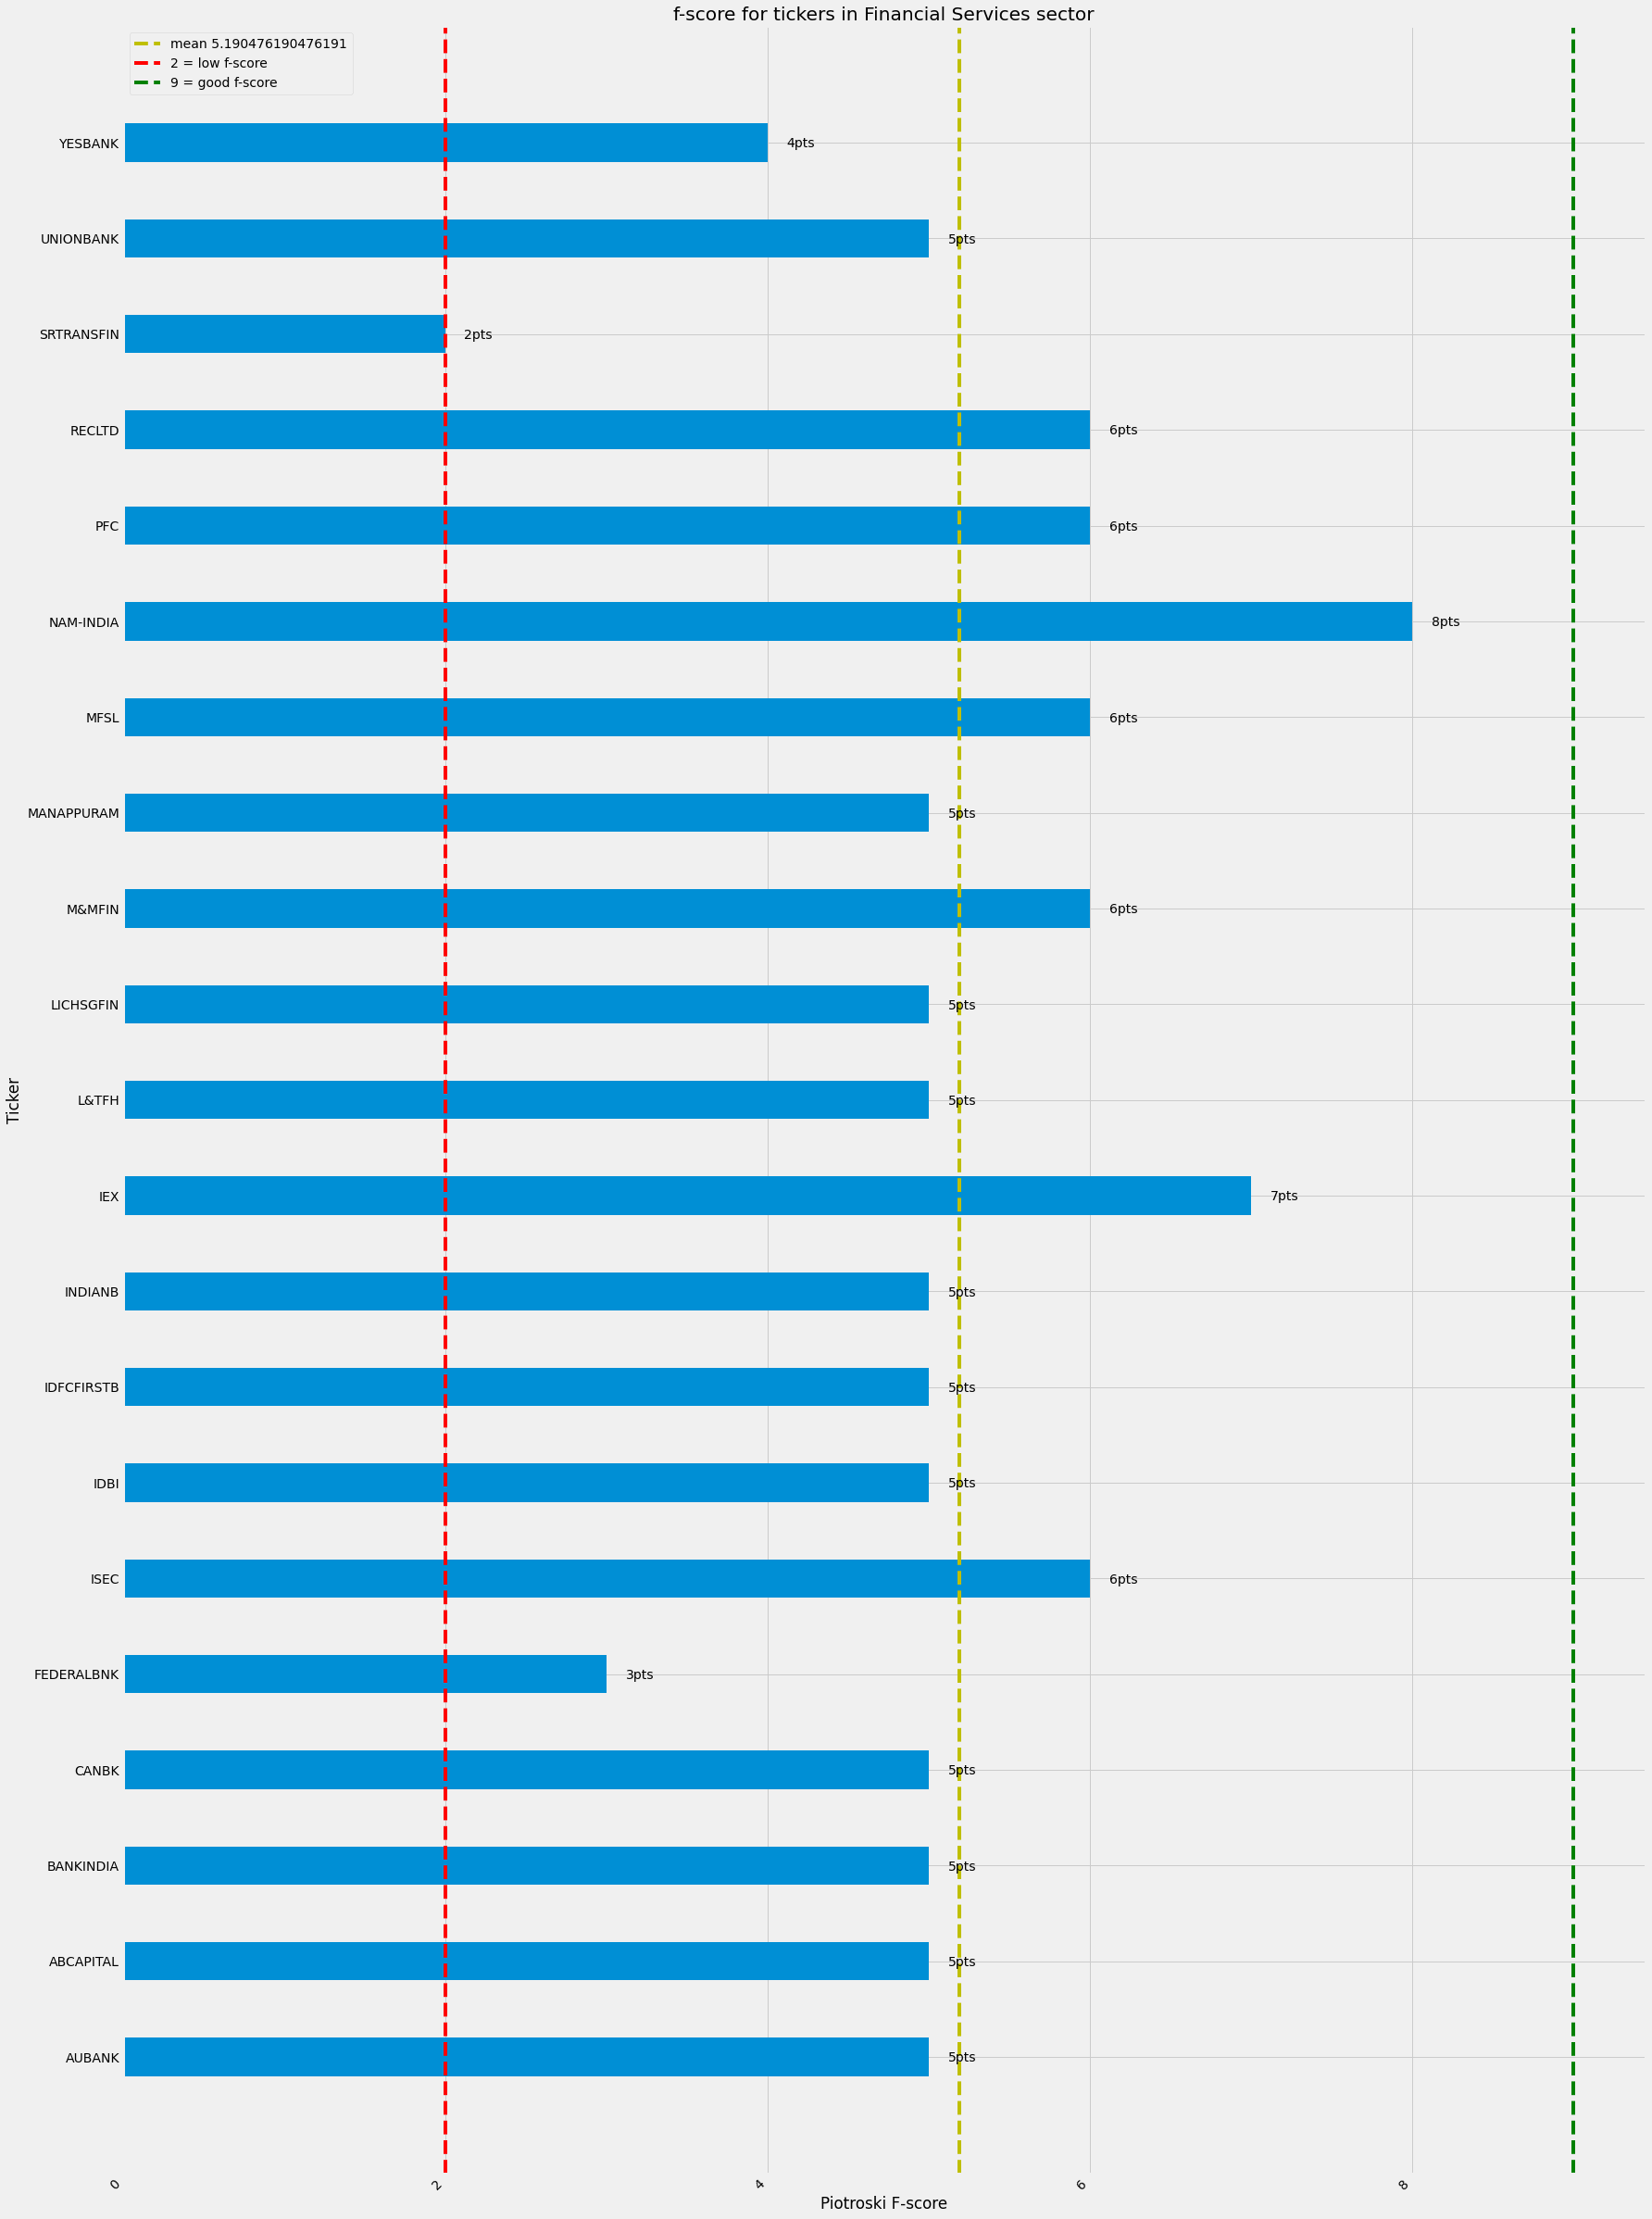

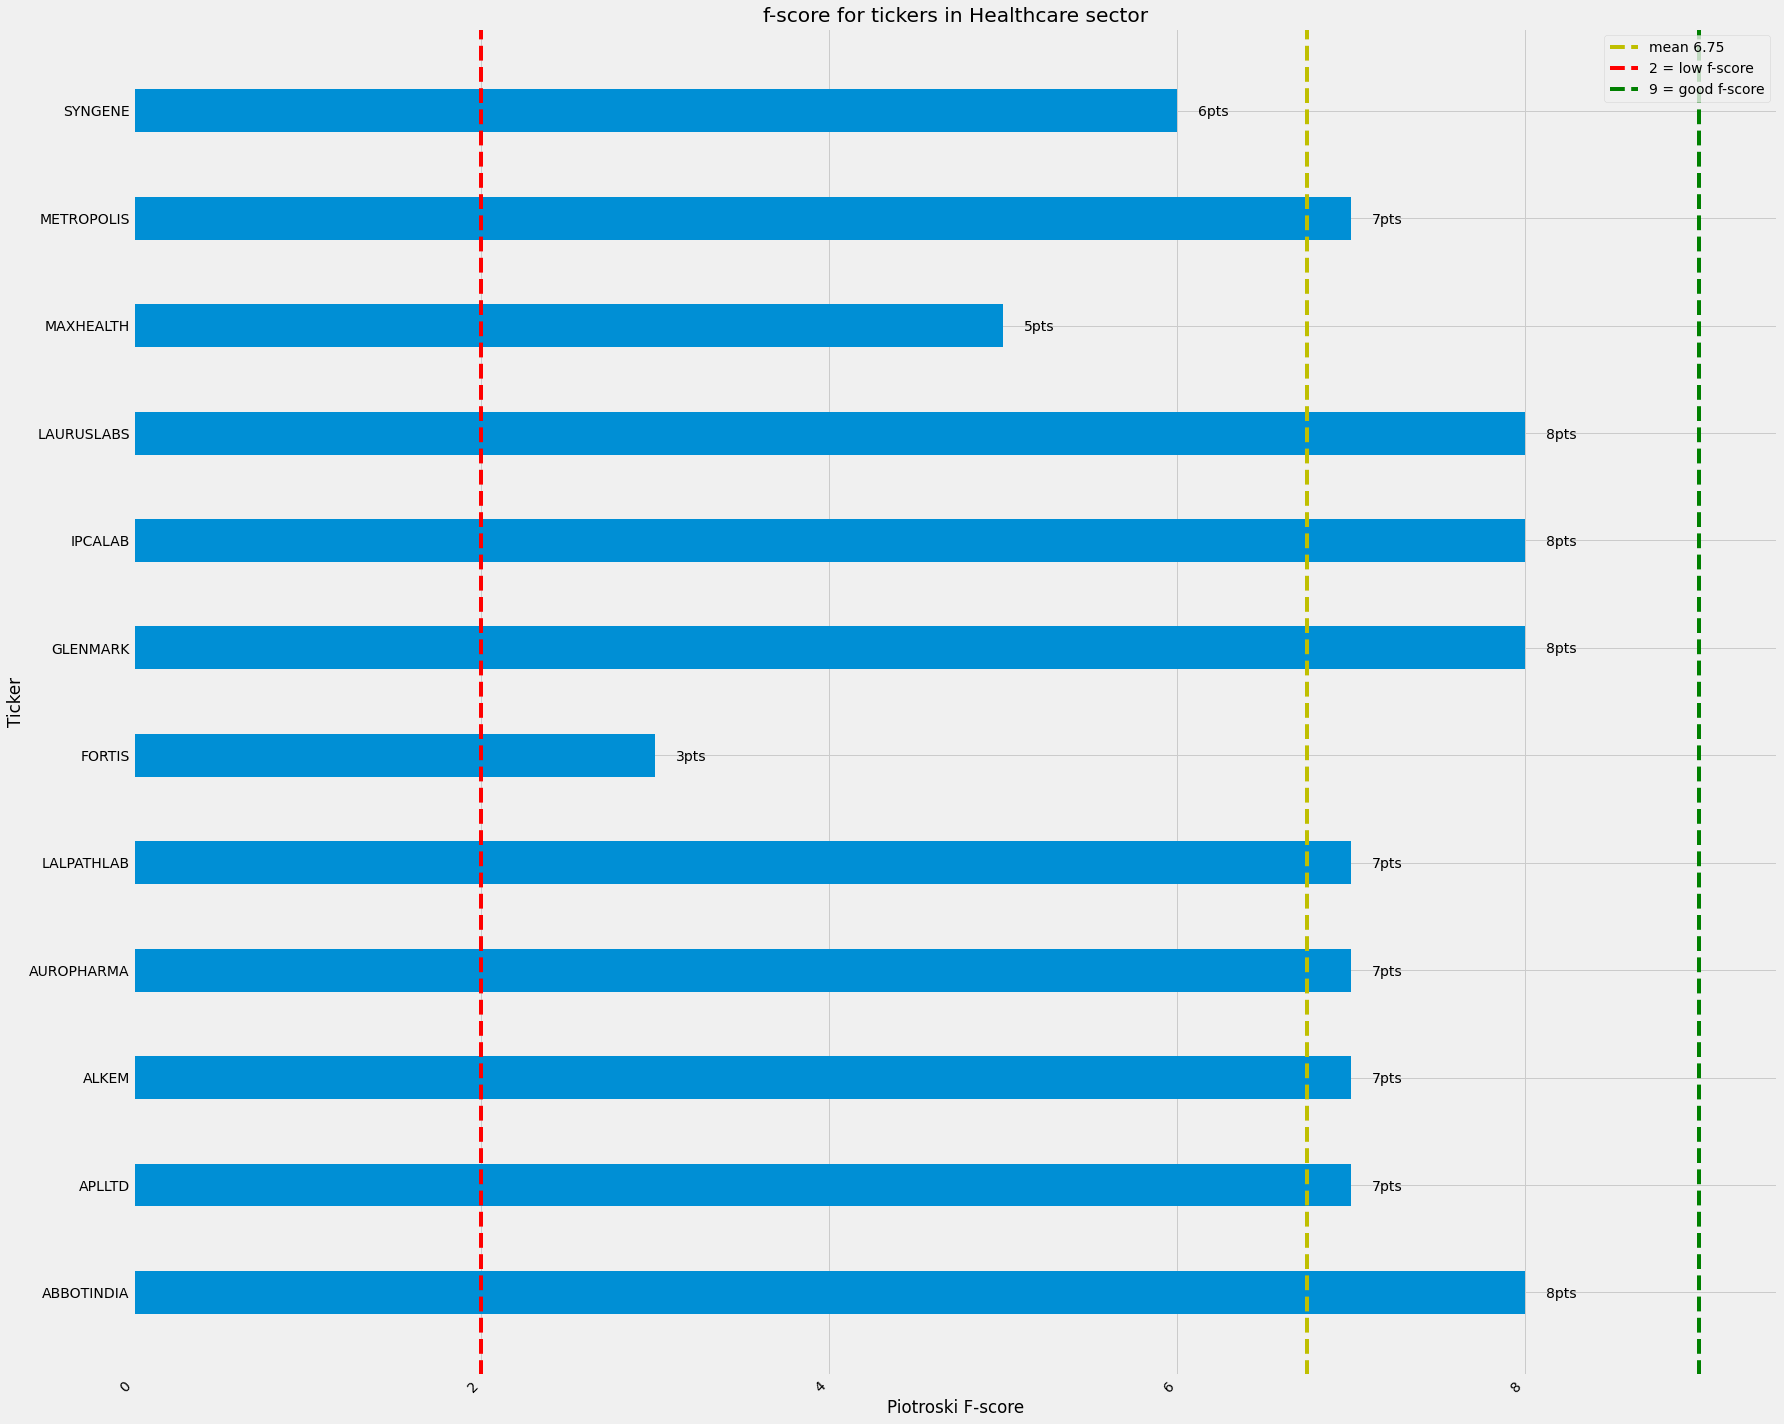

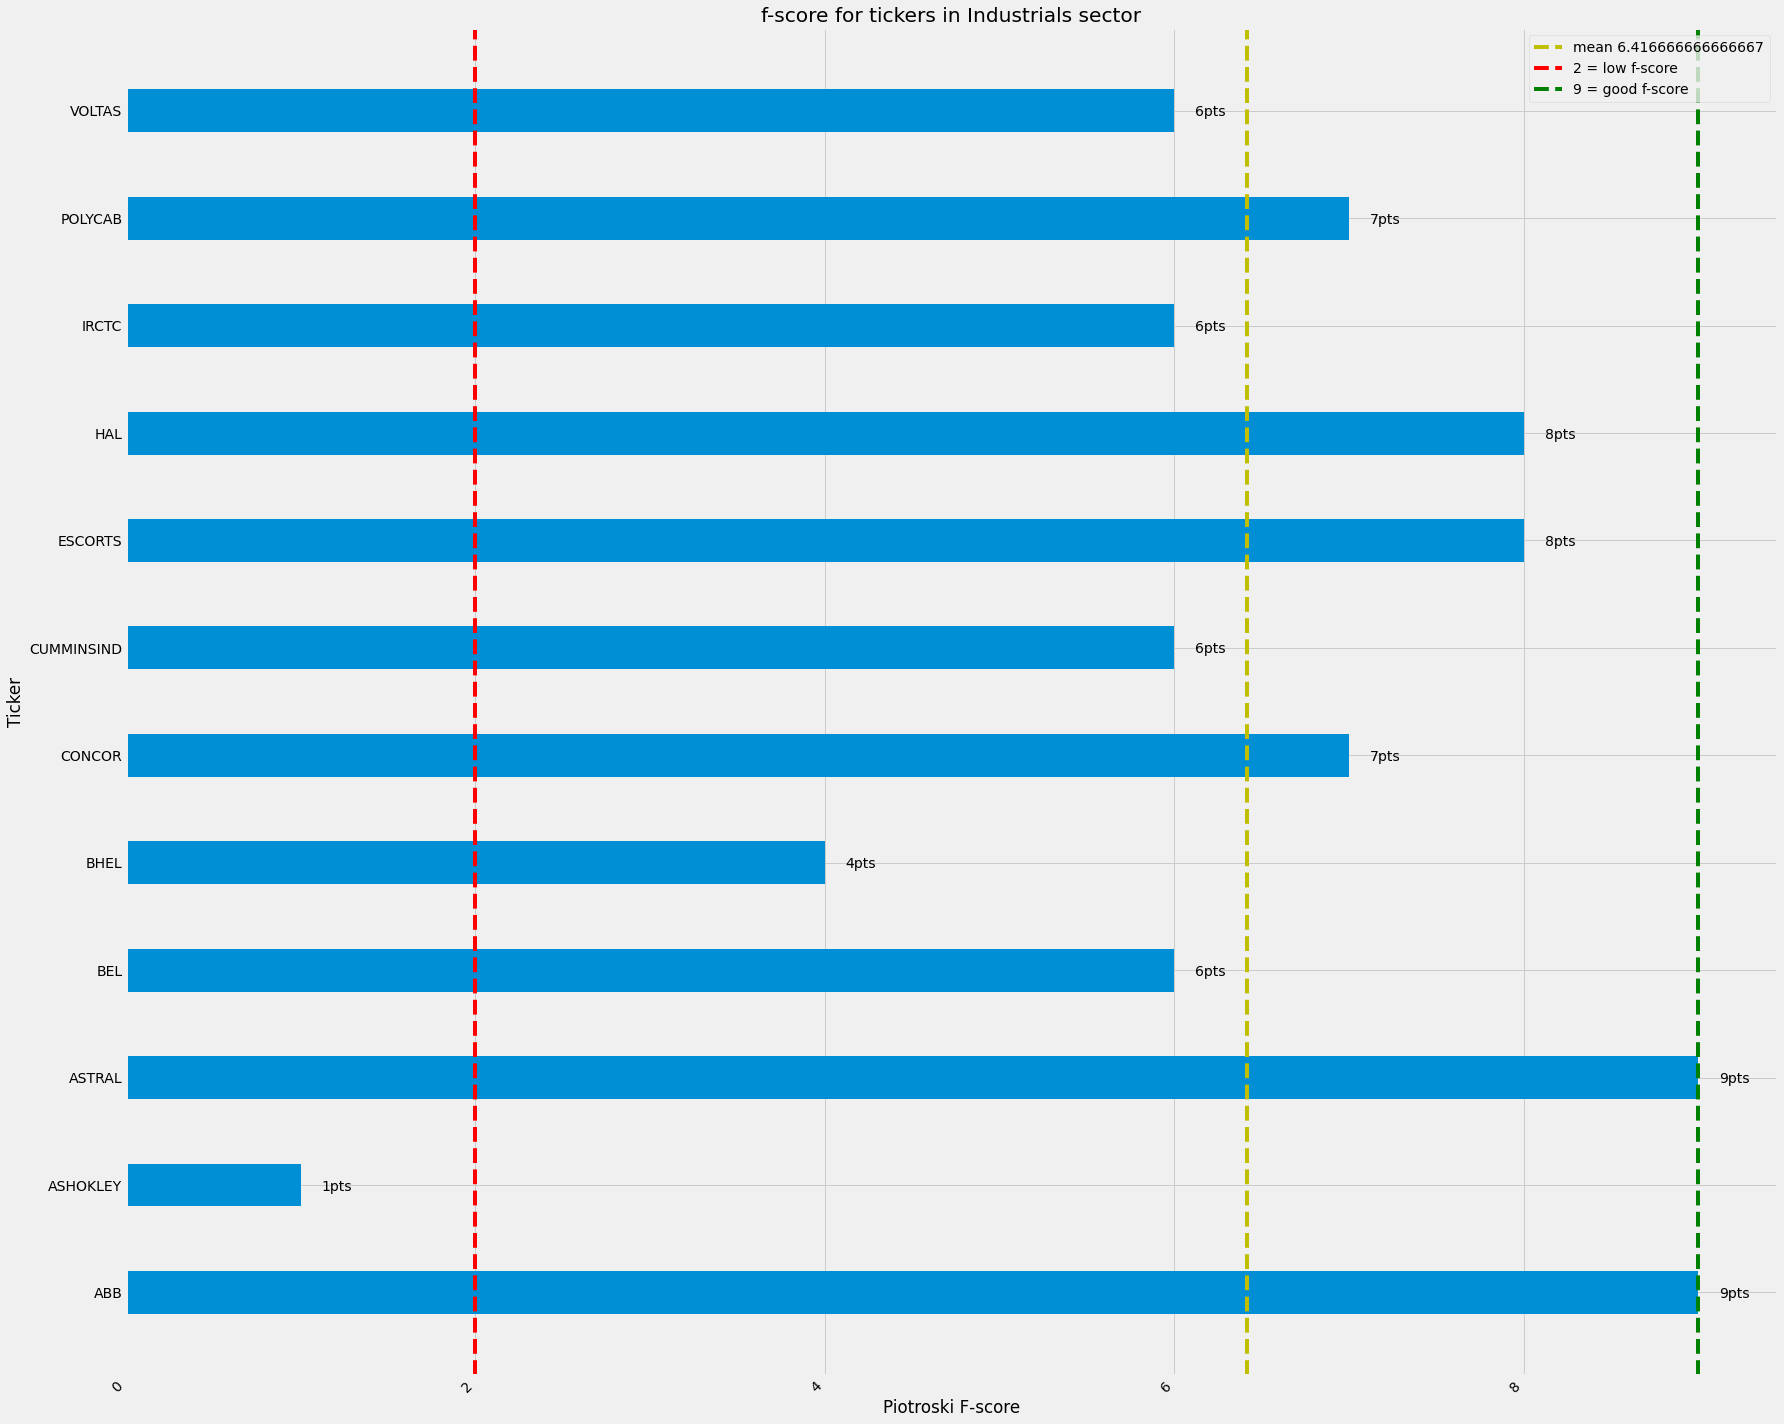

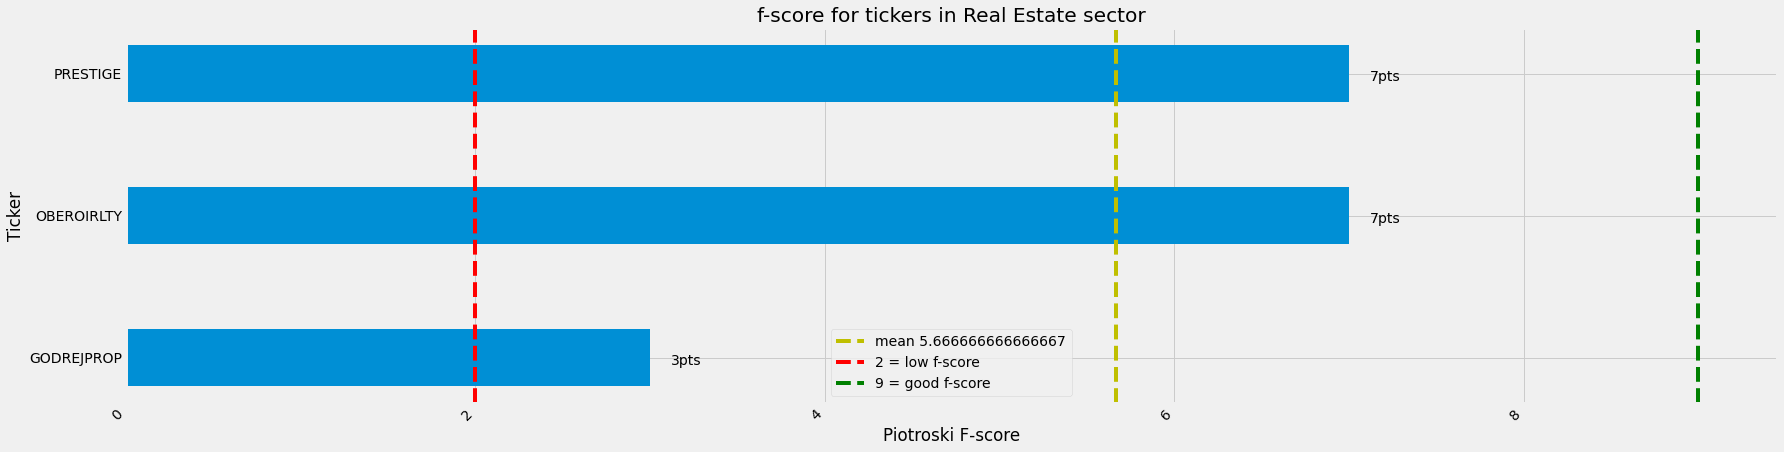

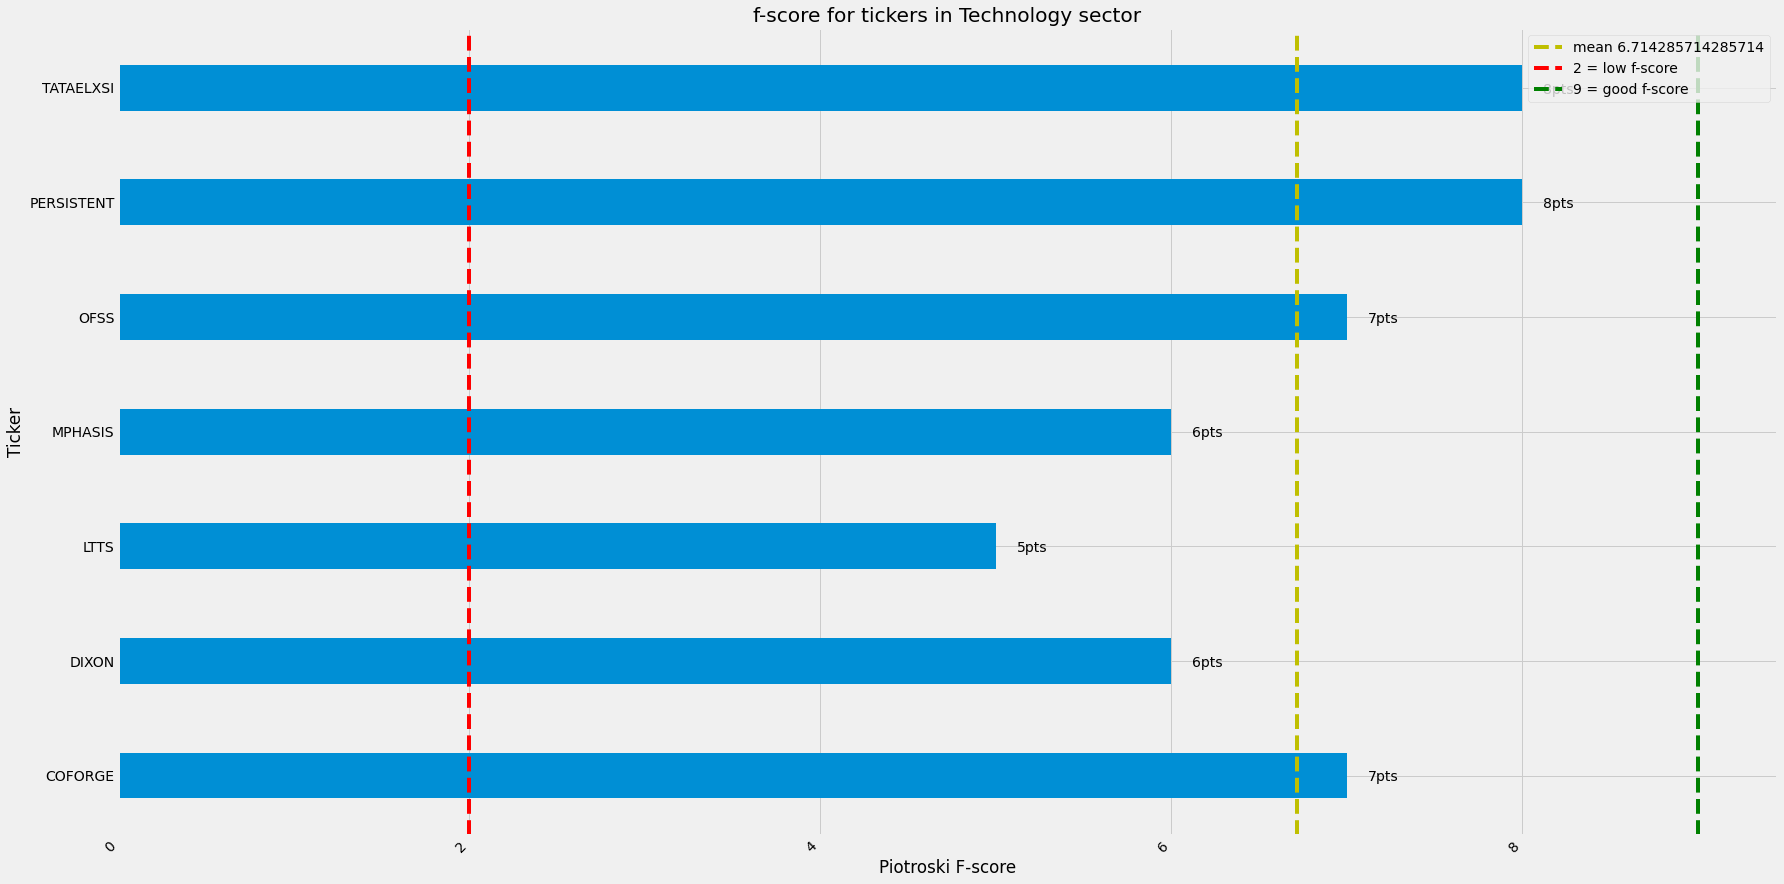

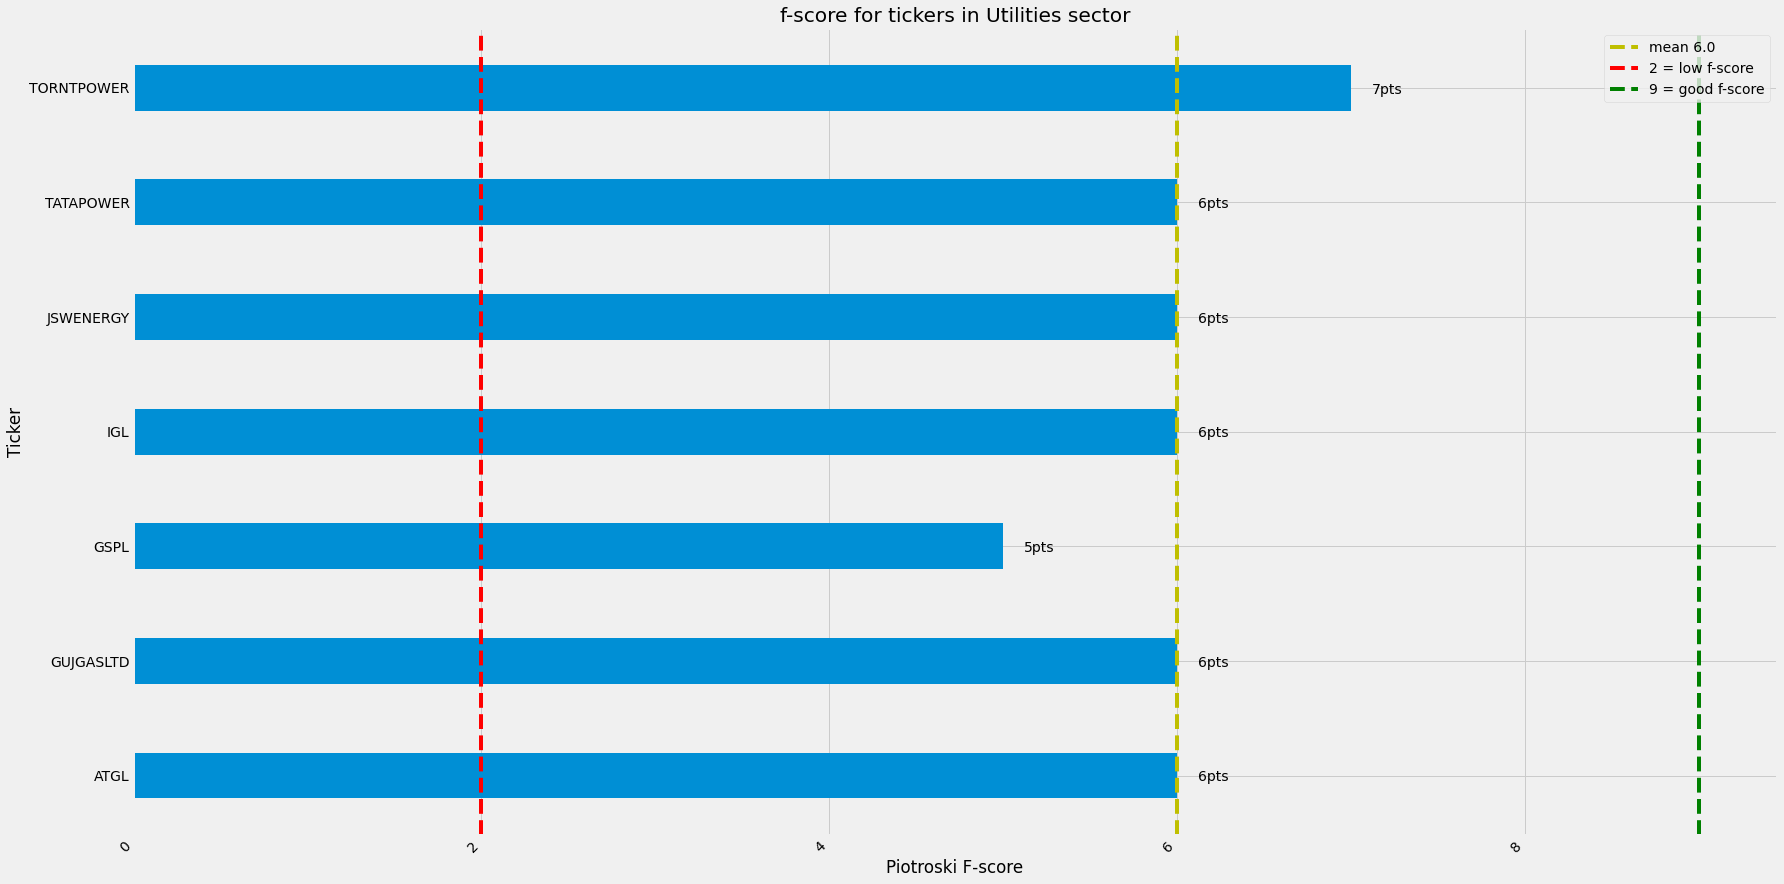

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


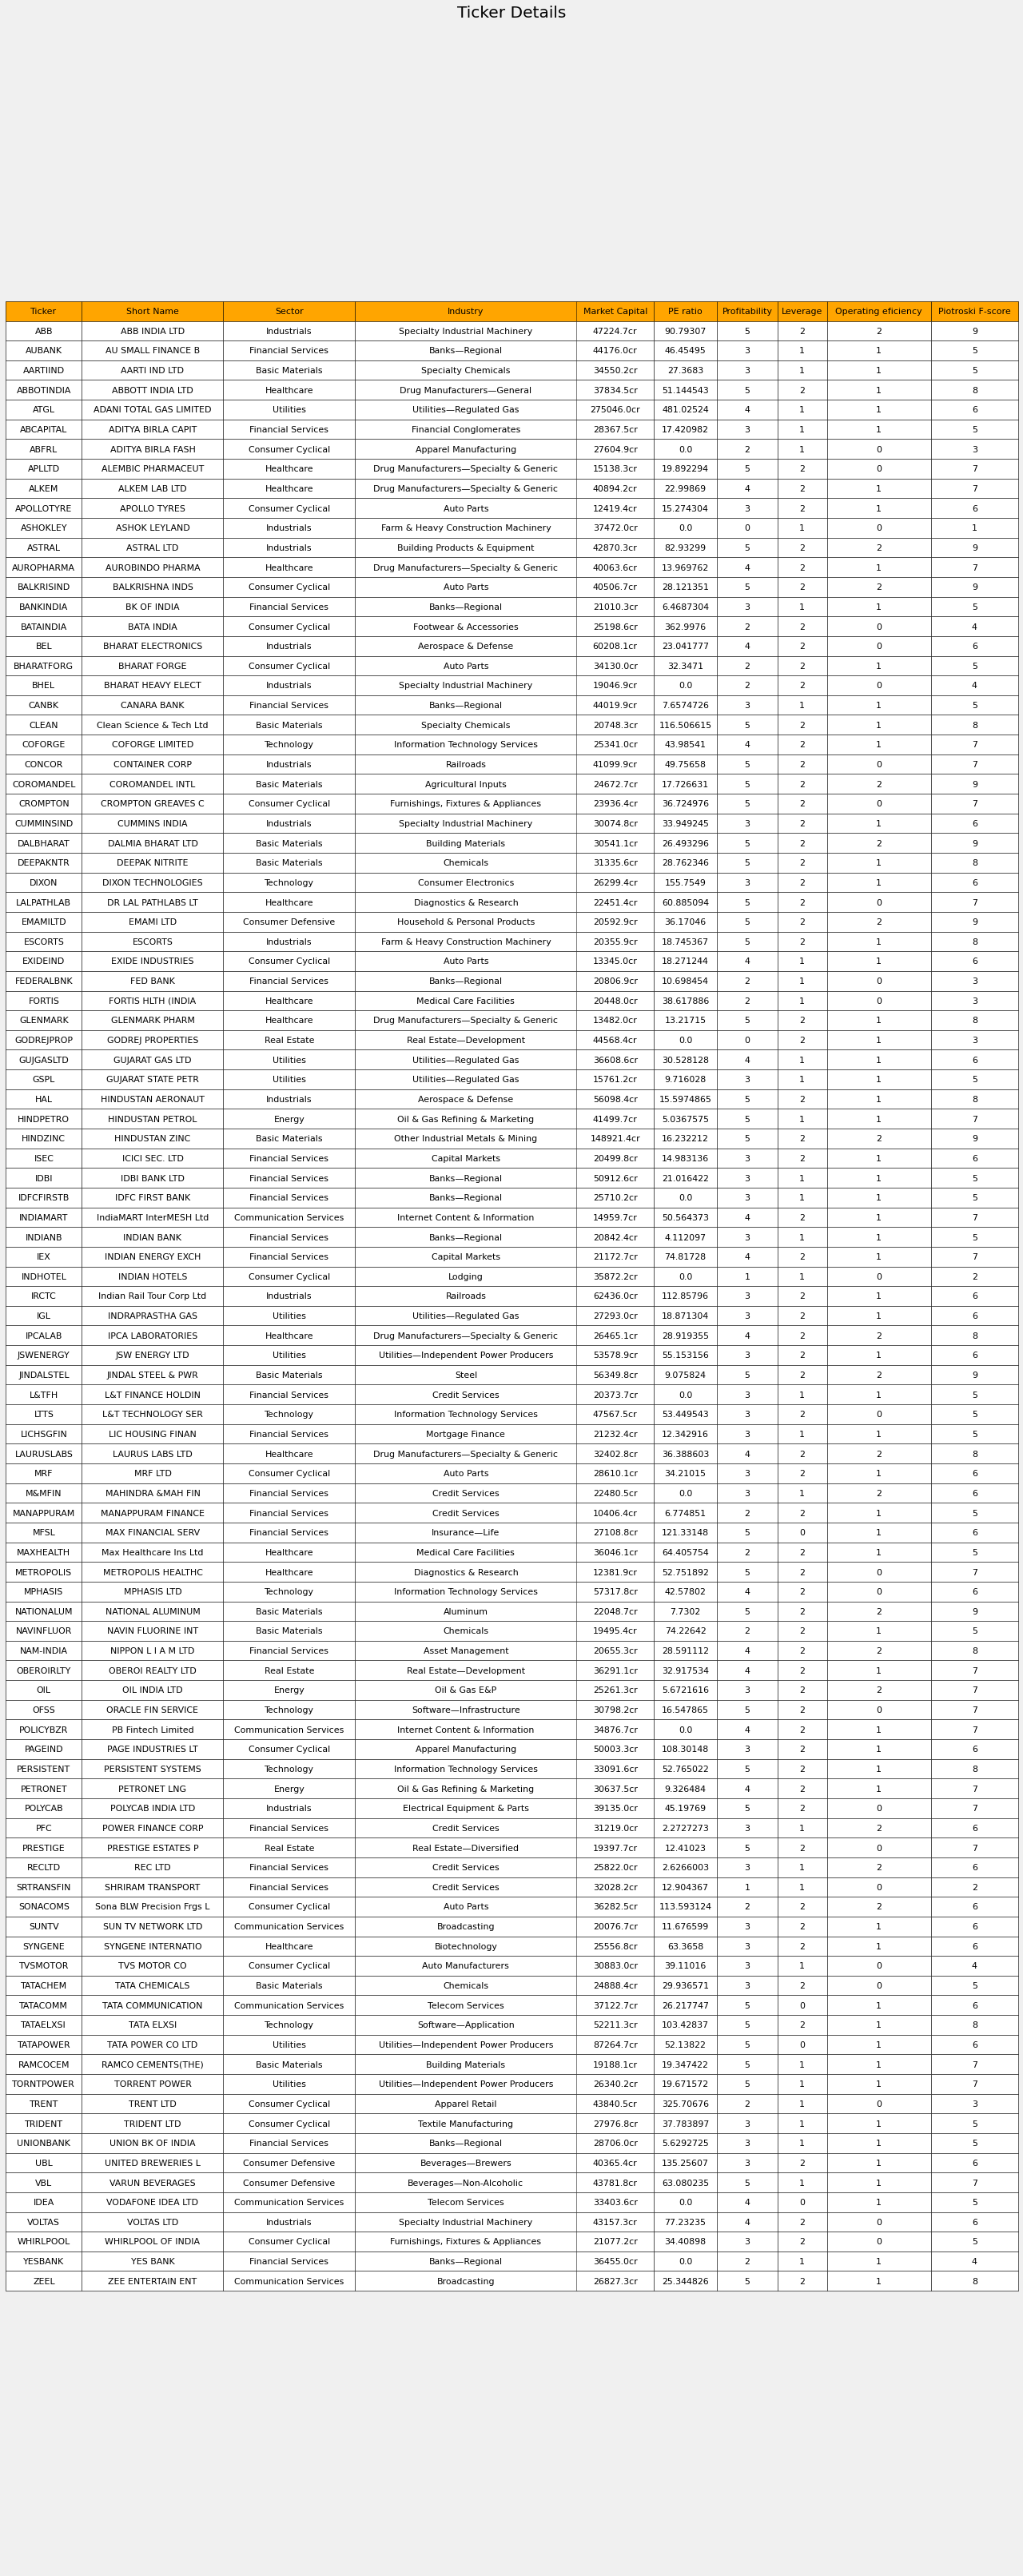

In [29]:
process(df=mdf, filename="mid_cap.pdf")

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)


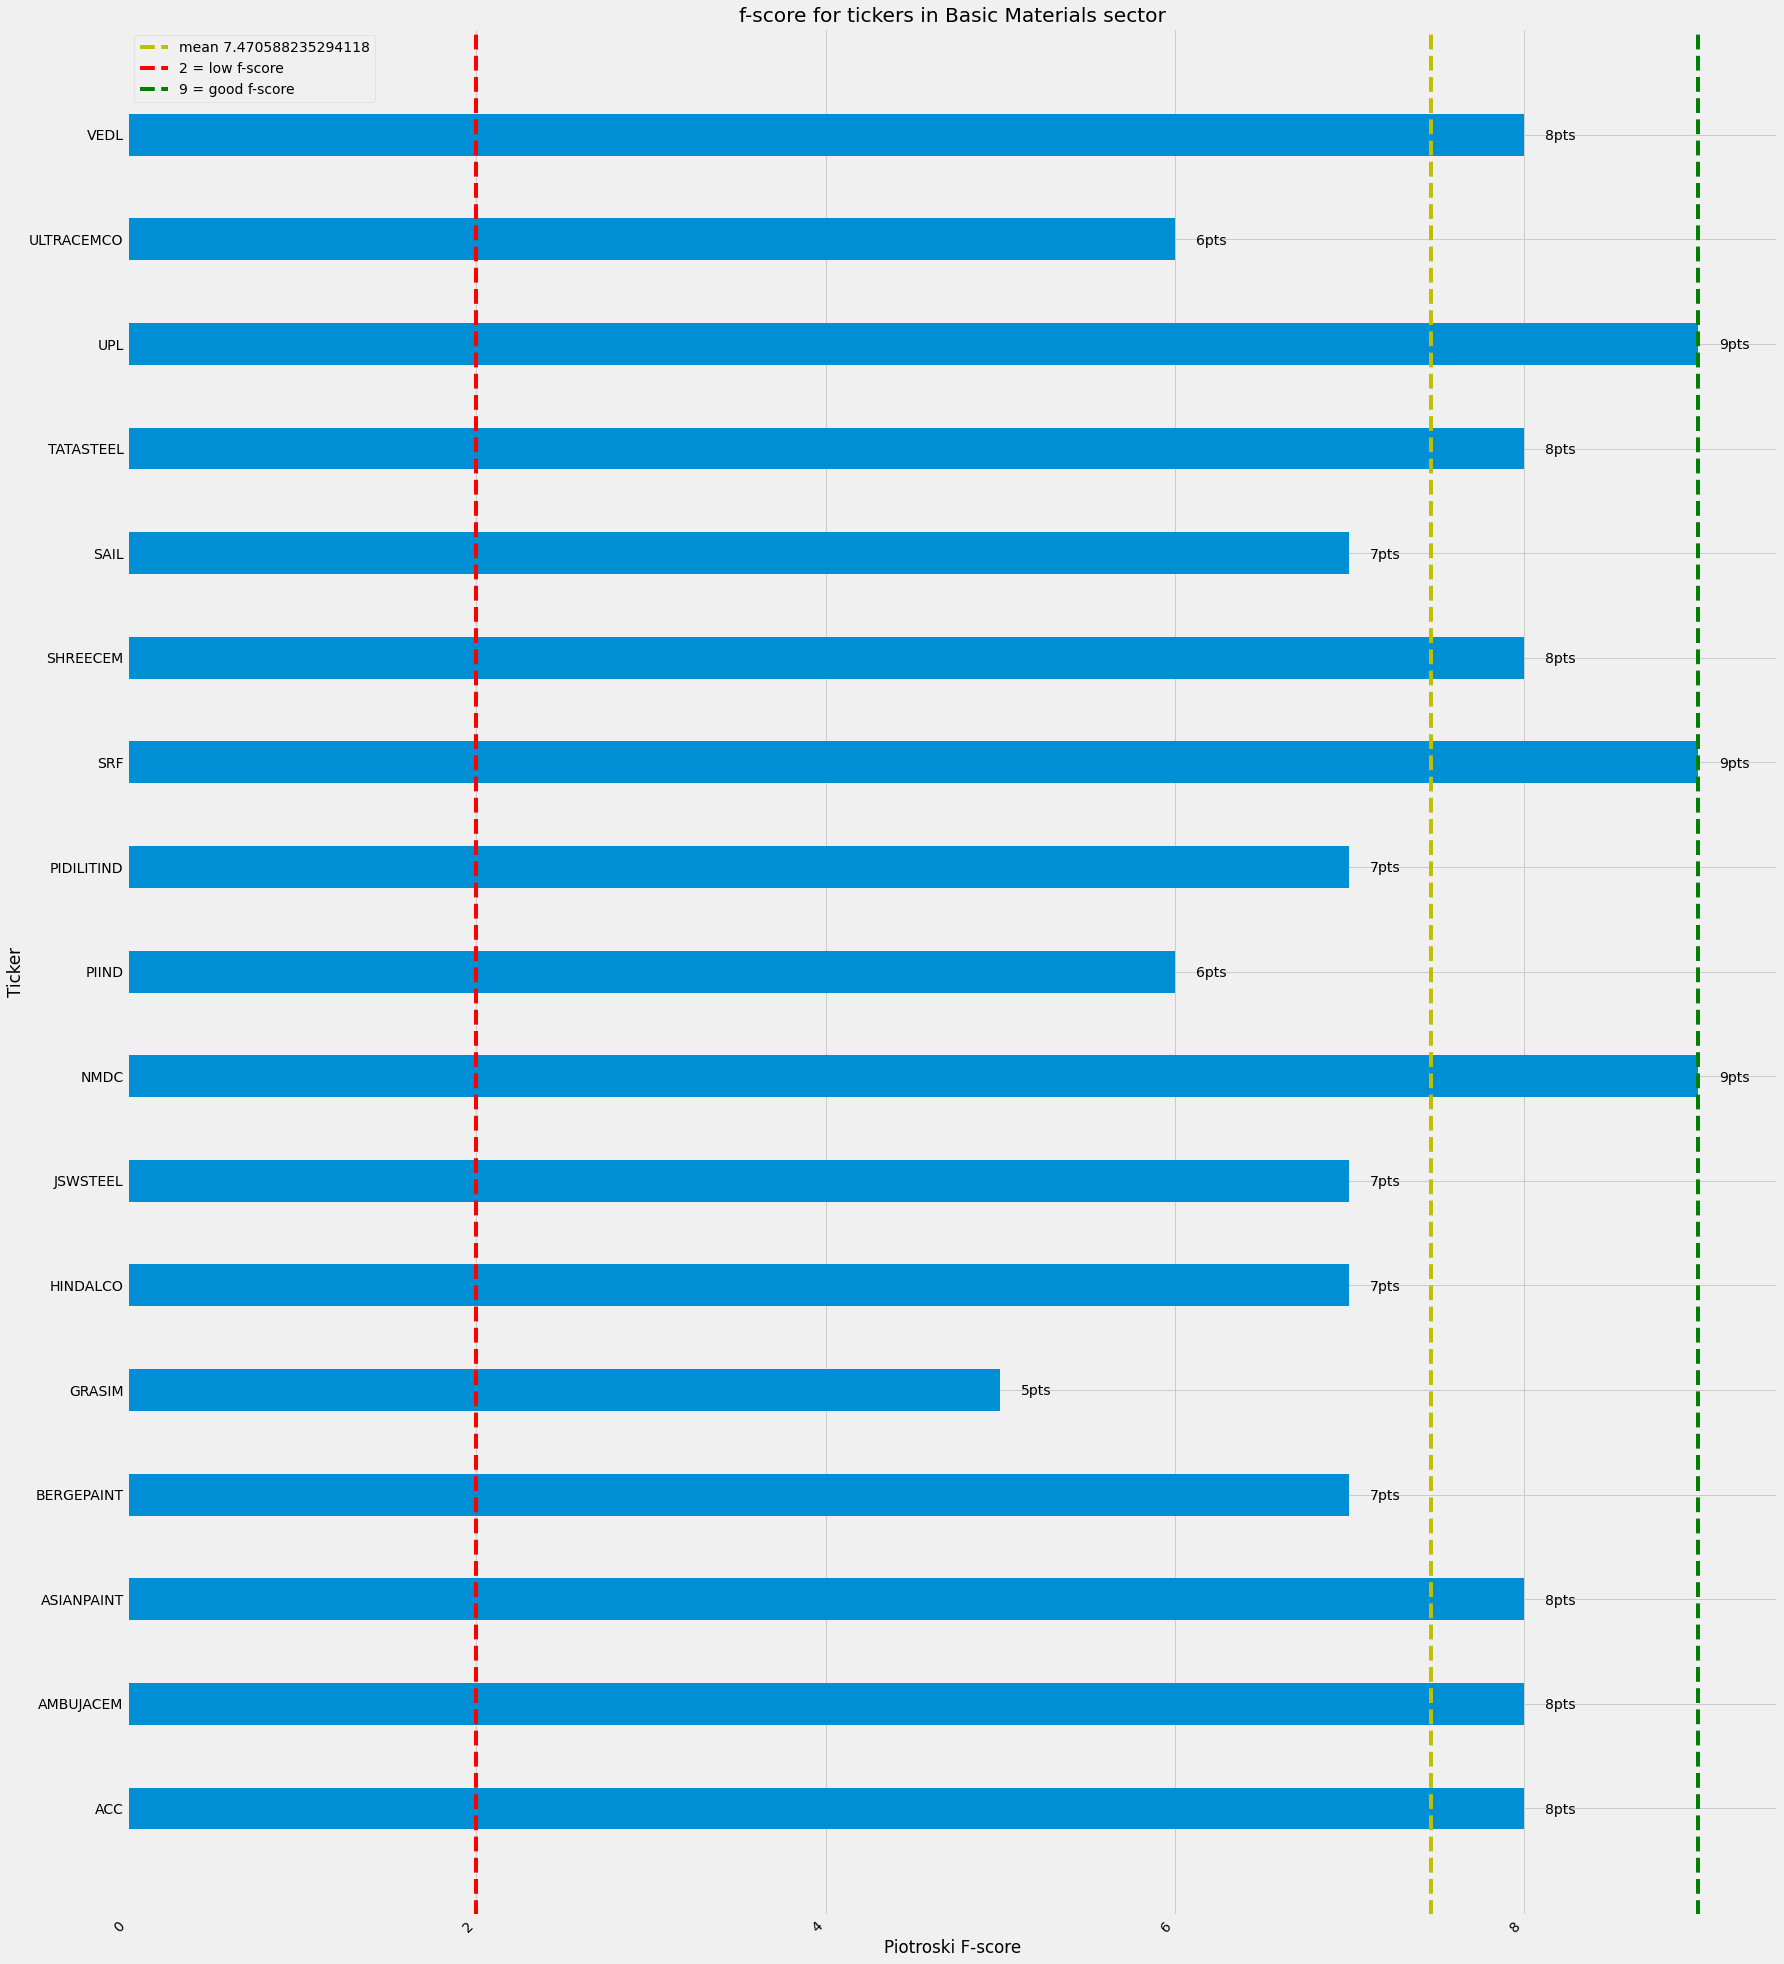

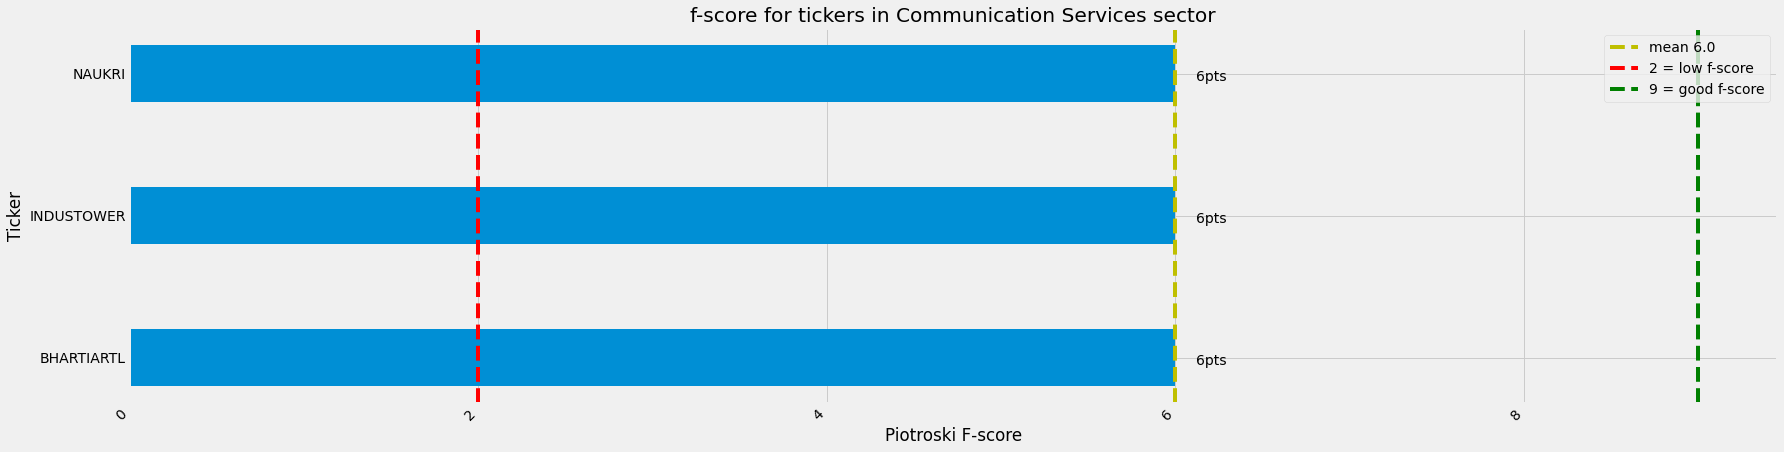

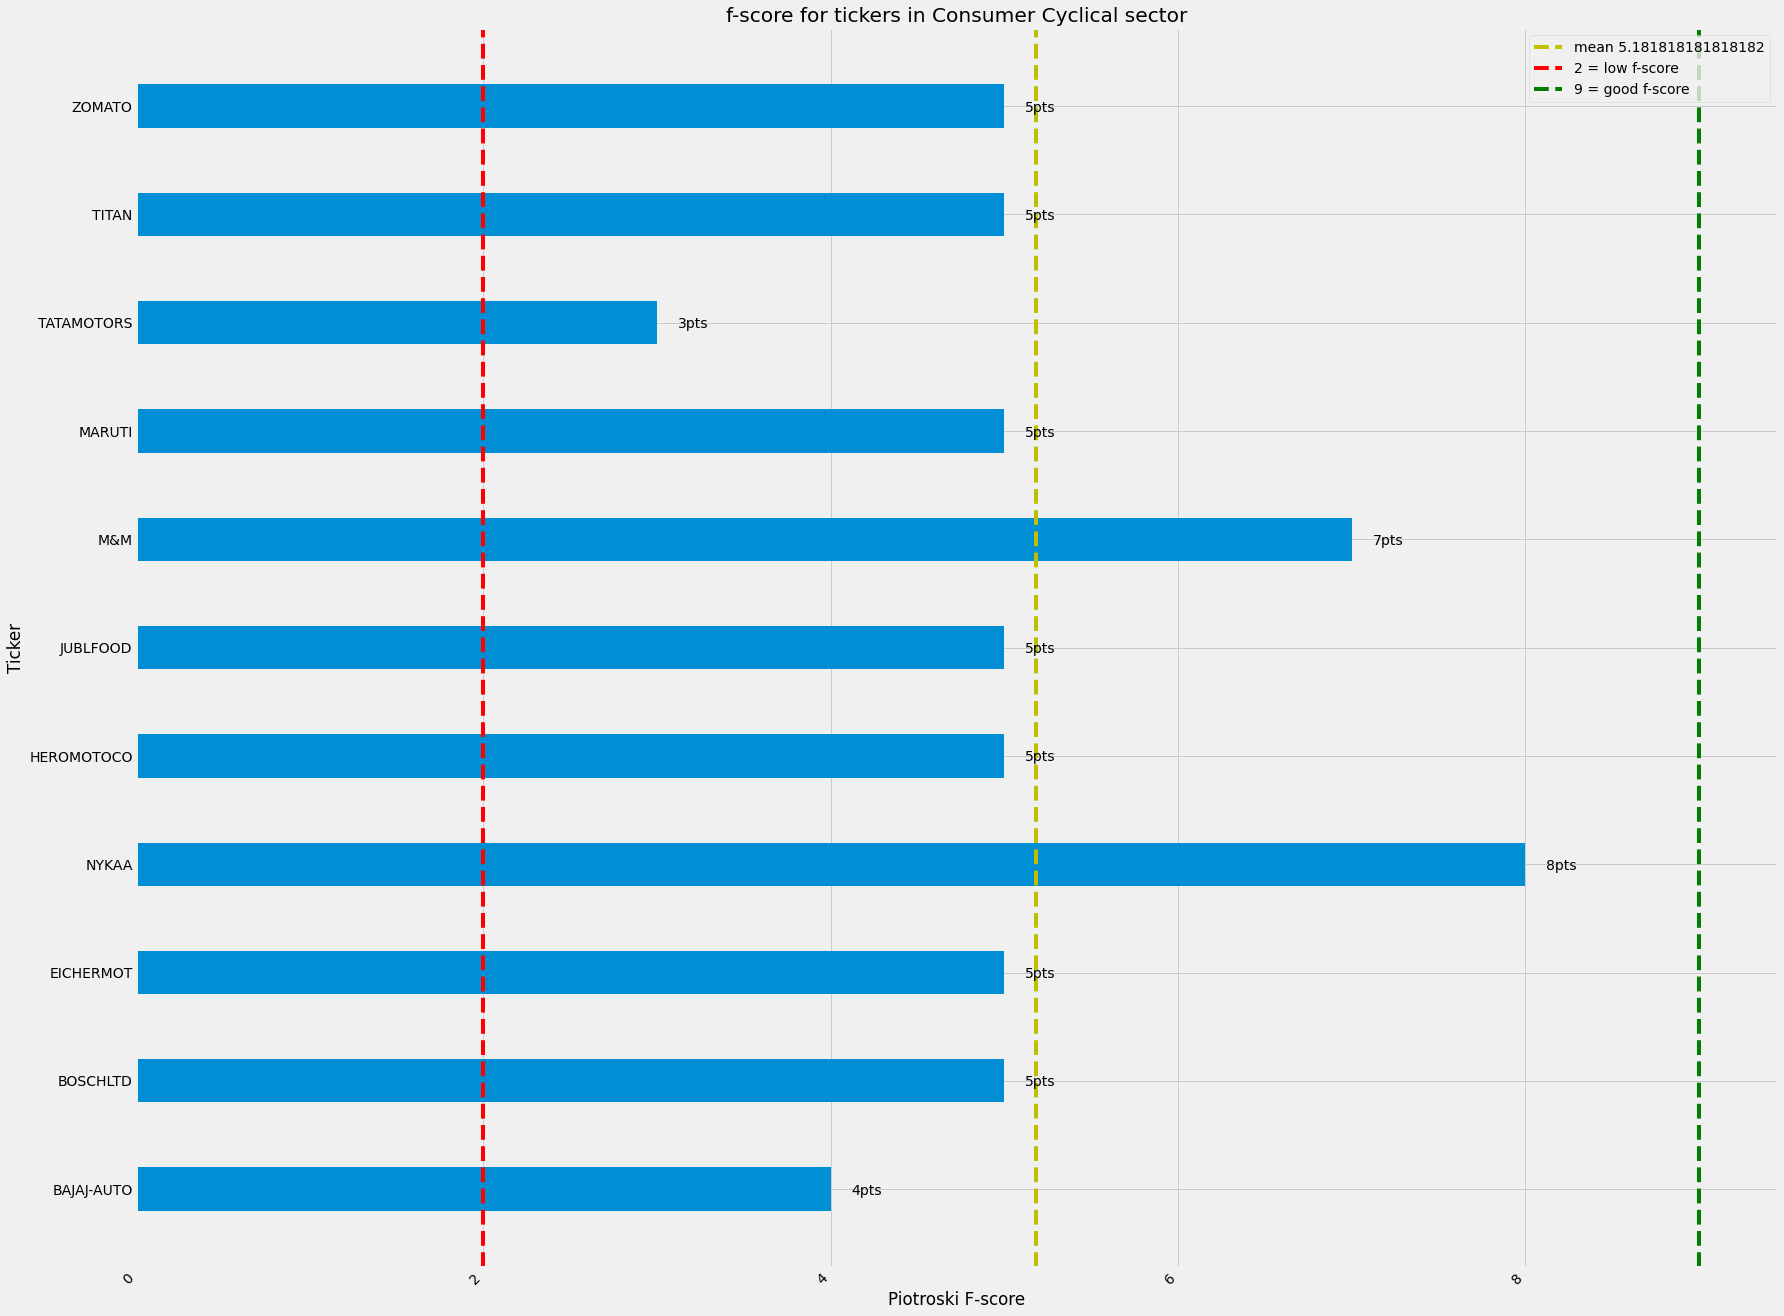

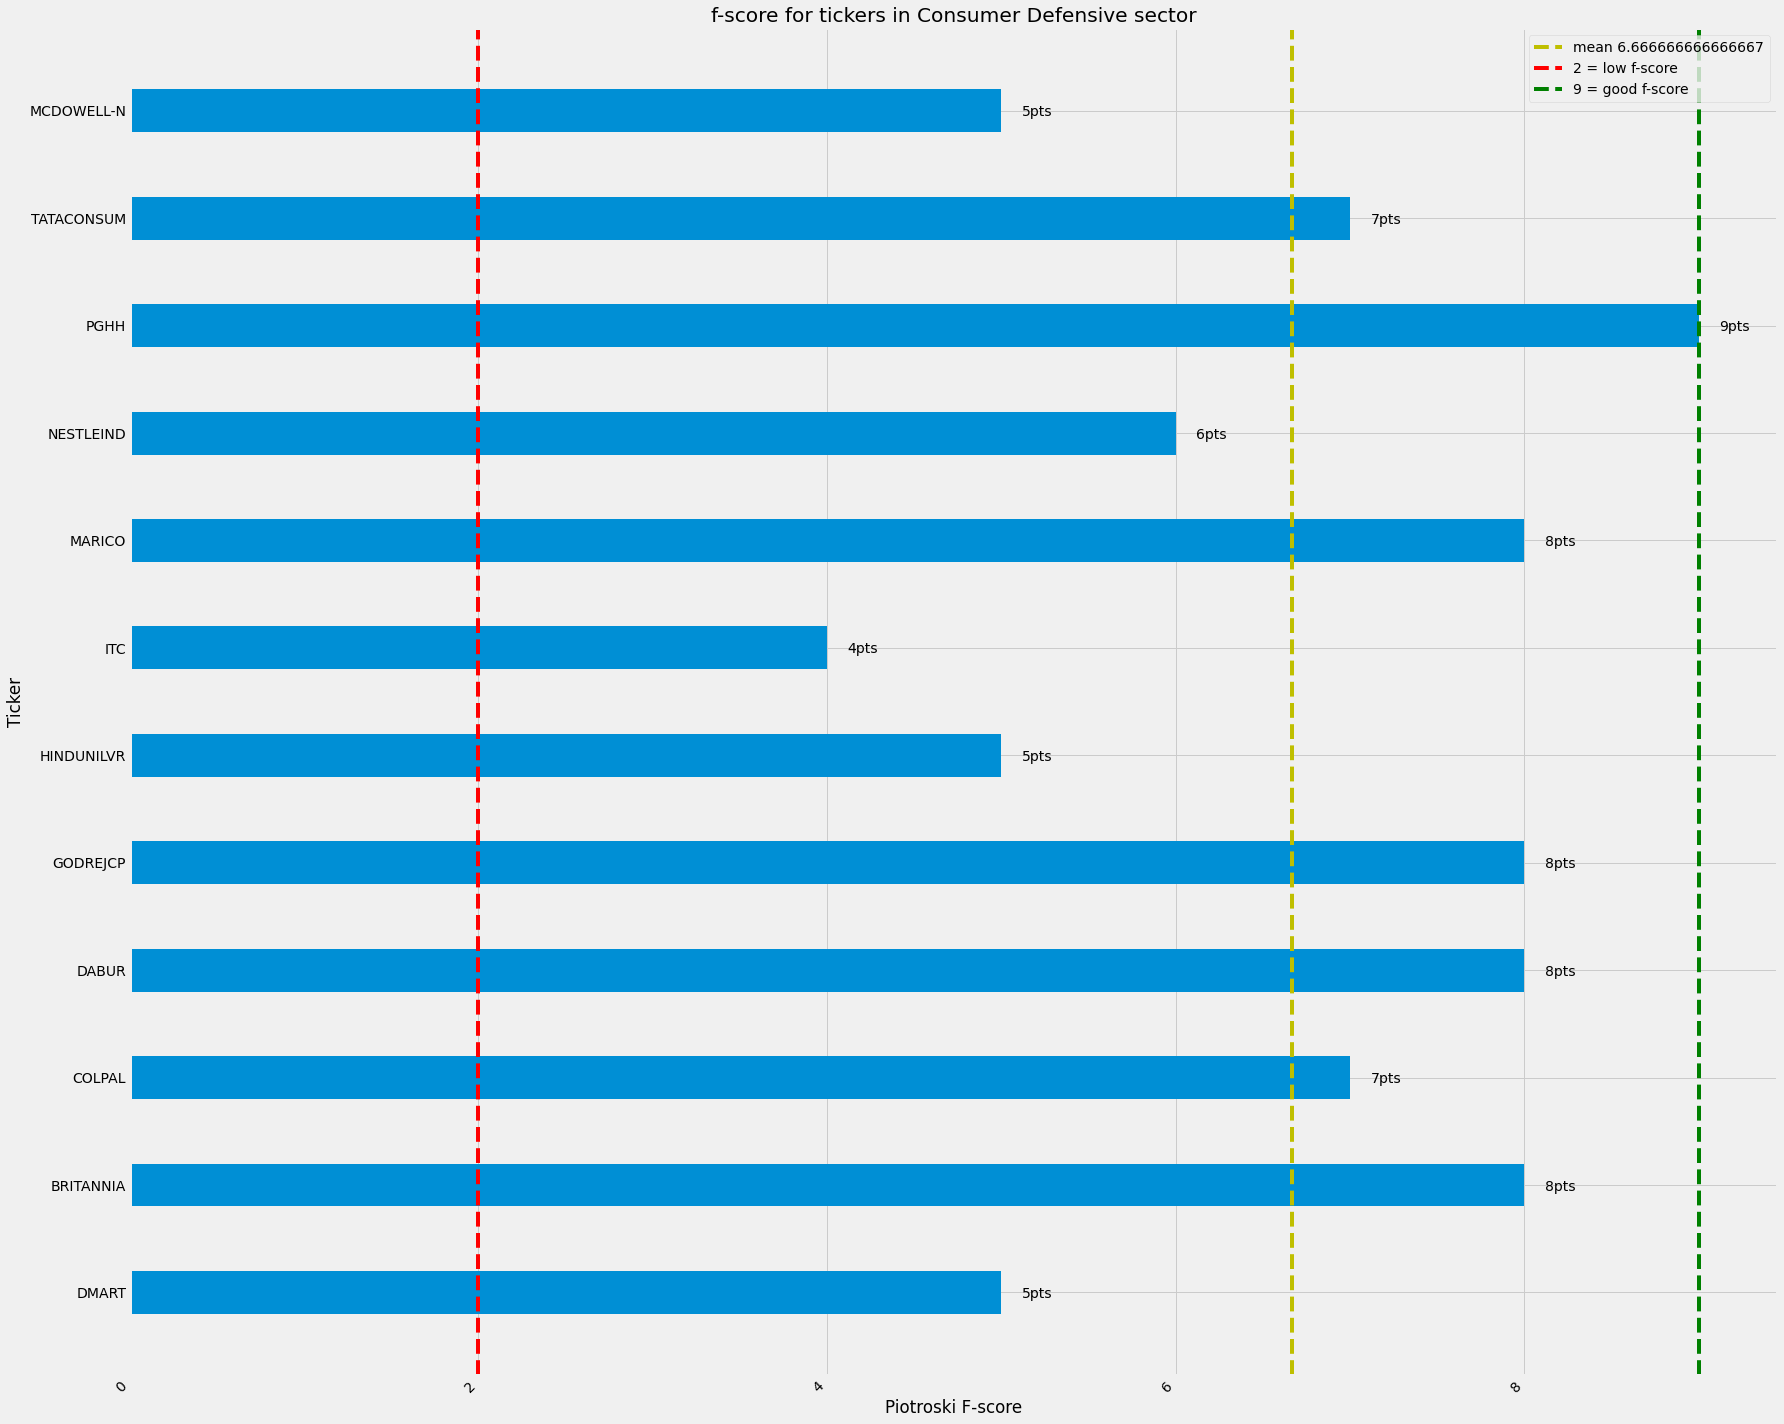

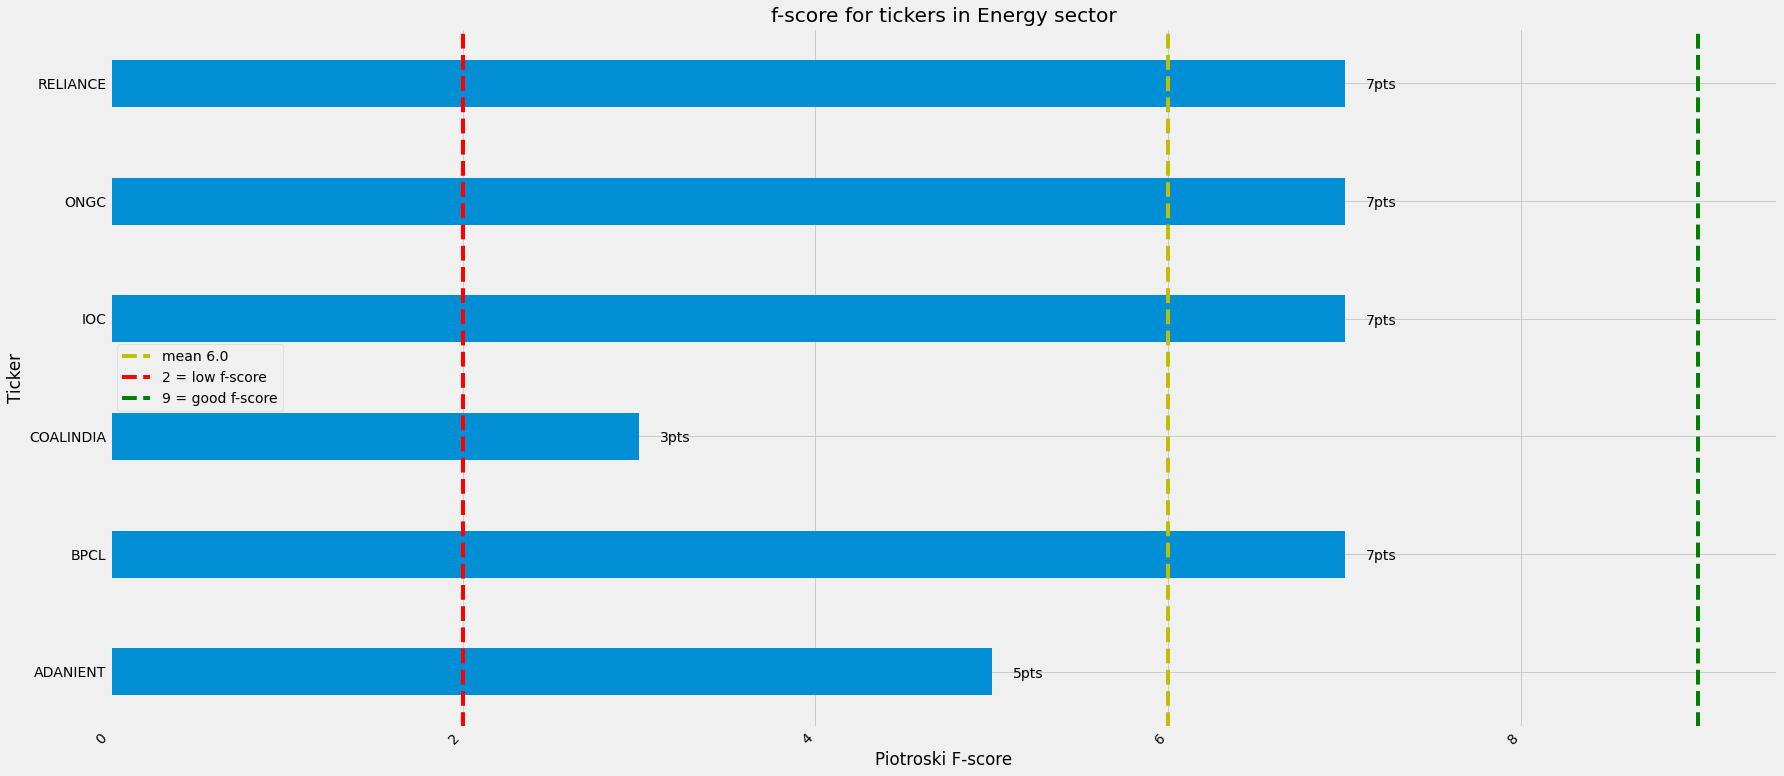

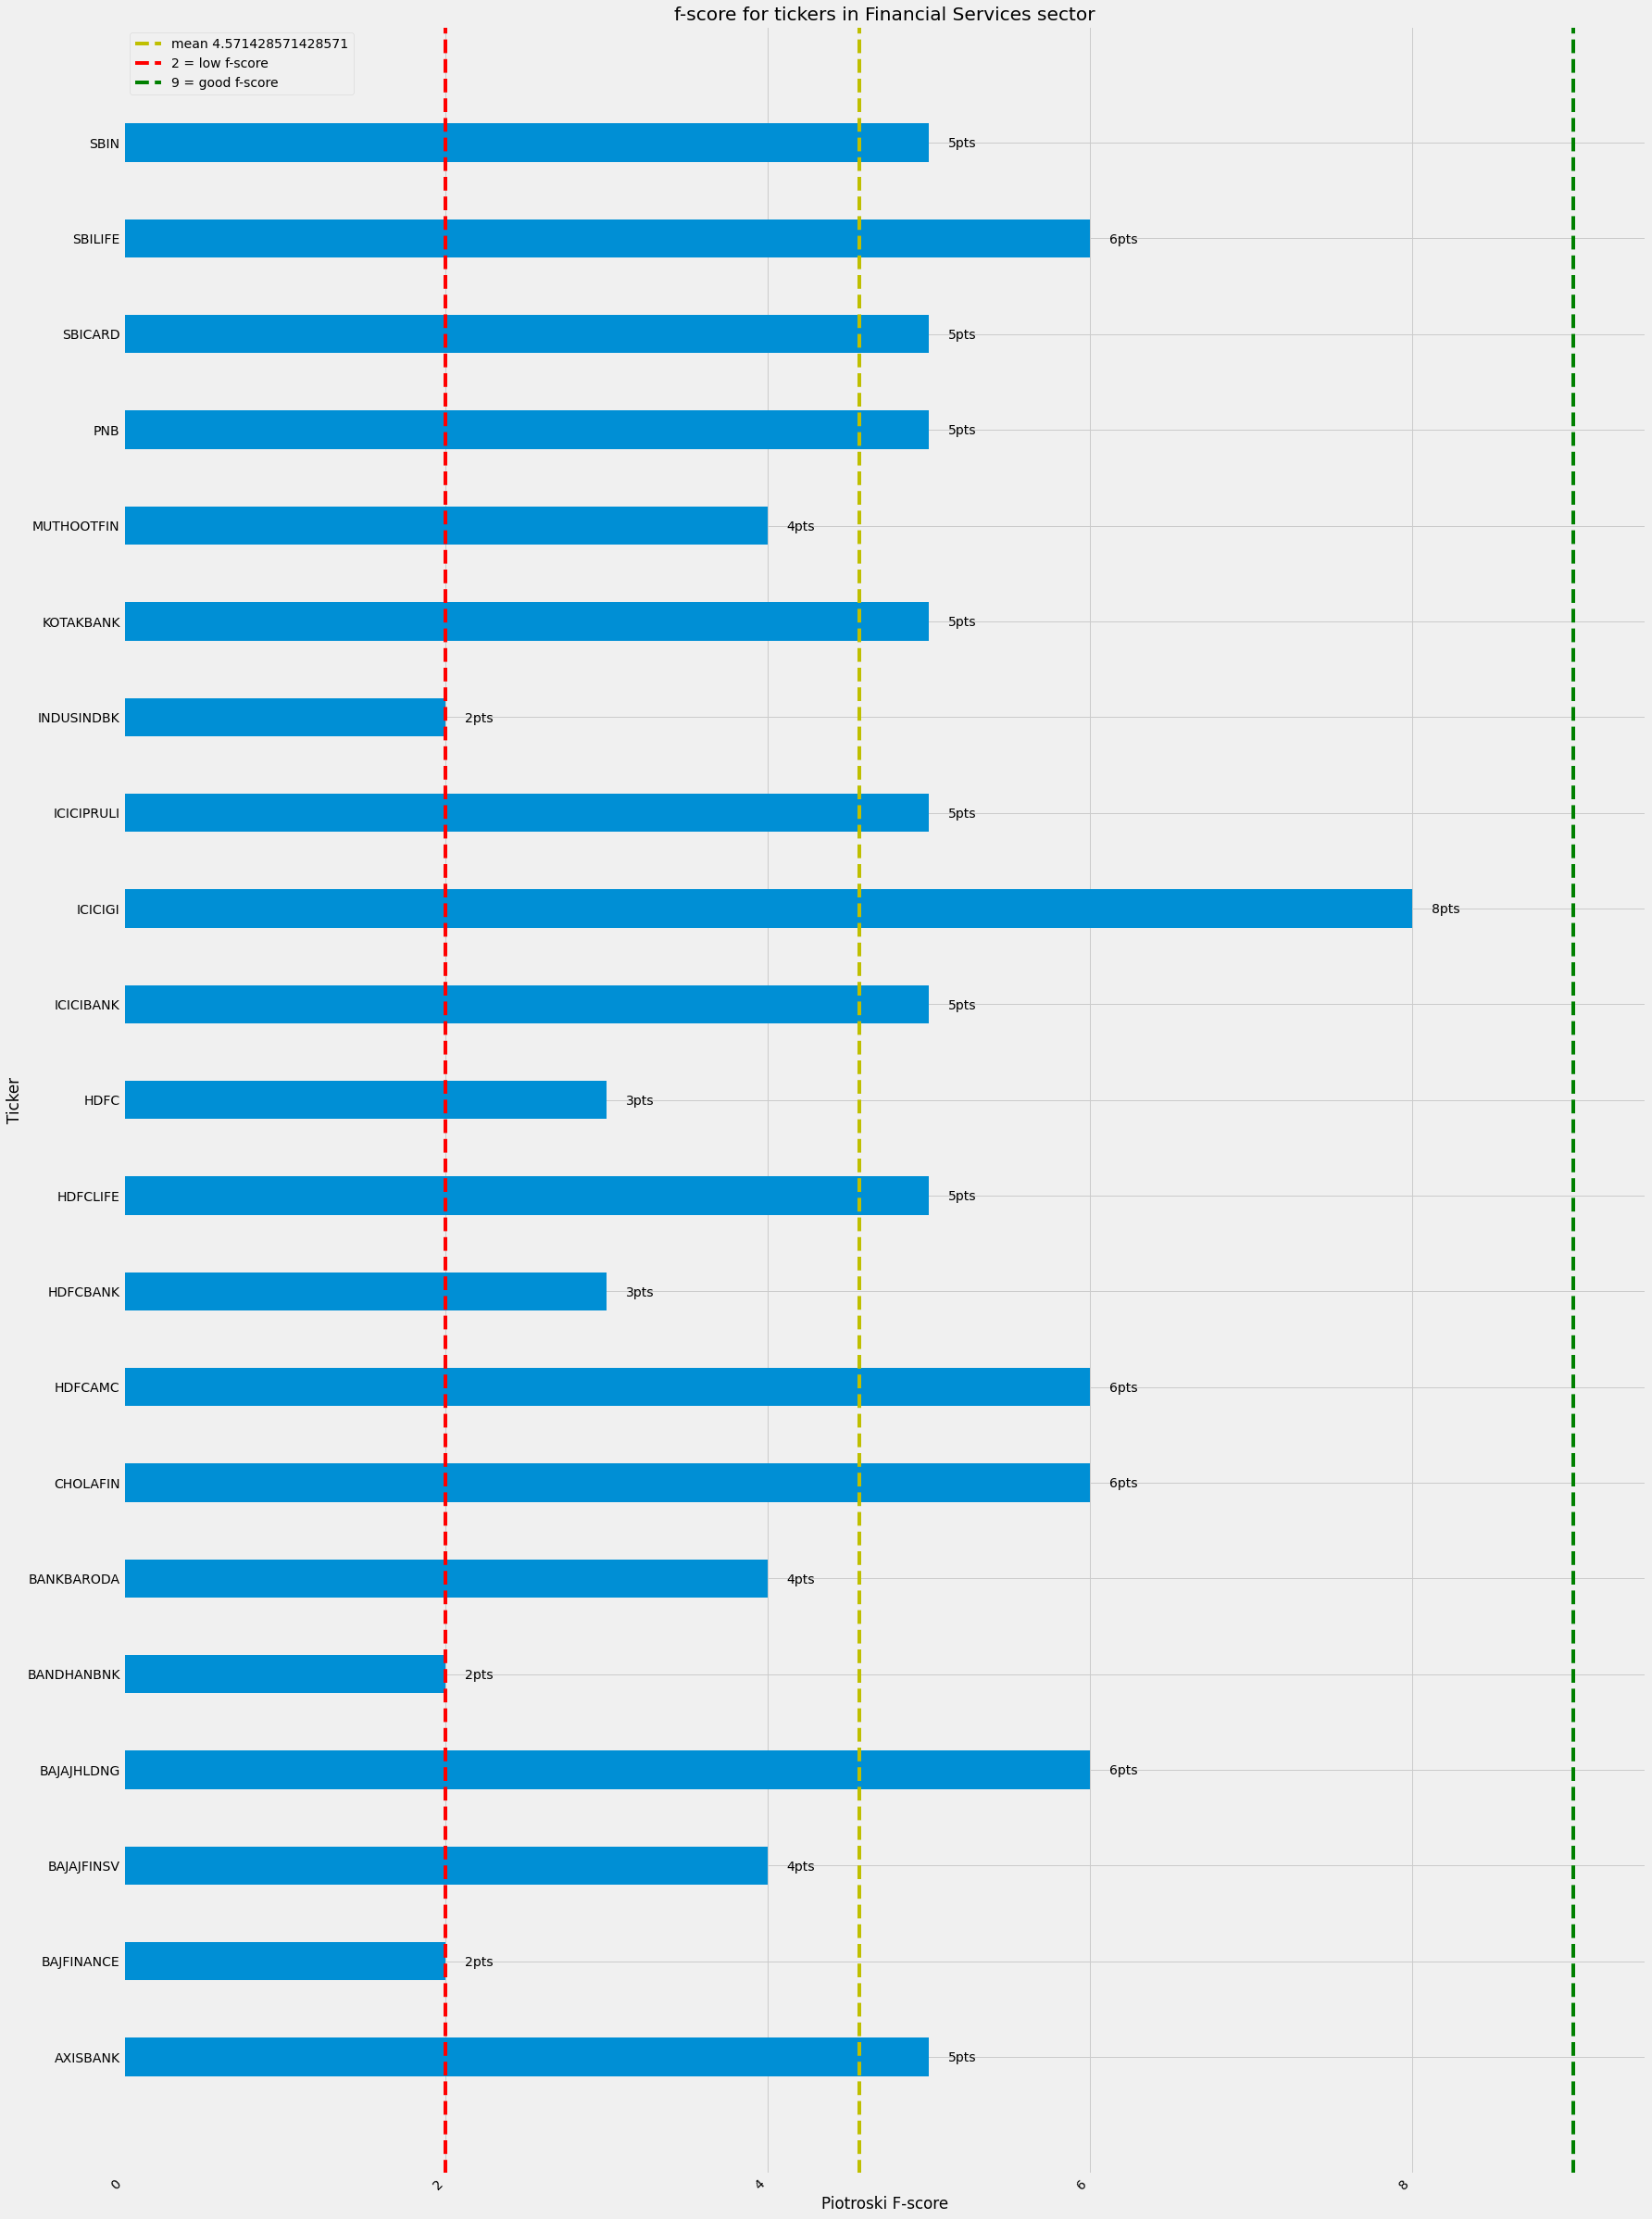

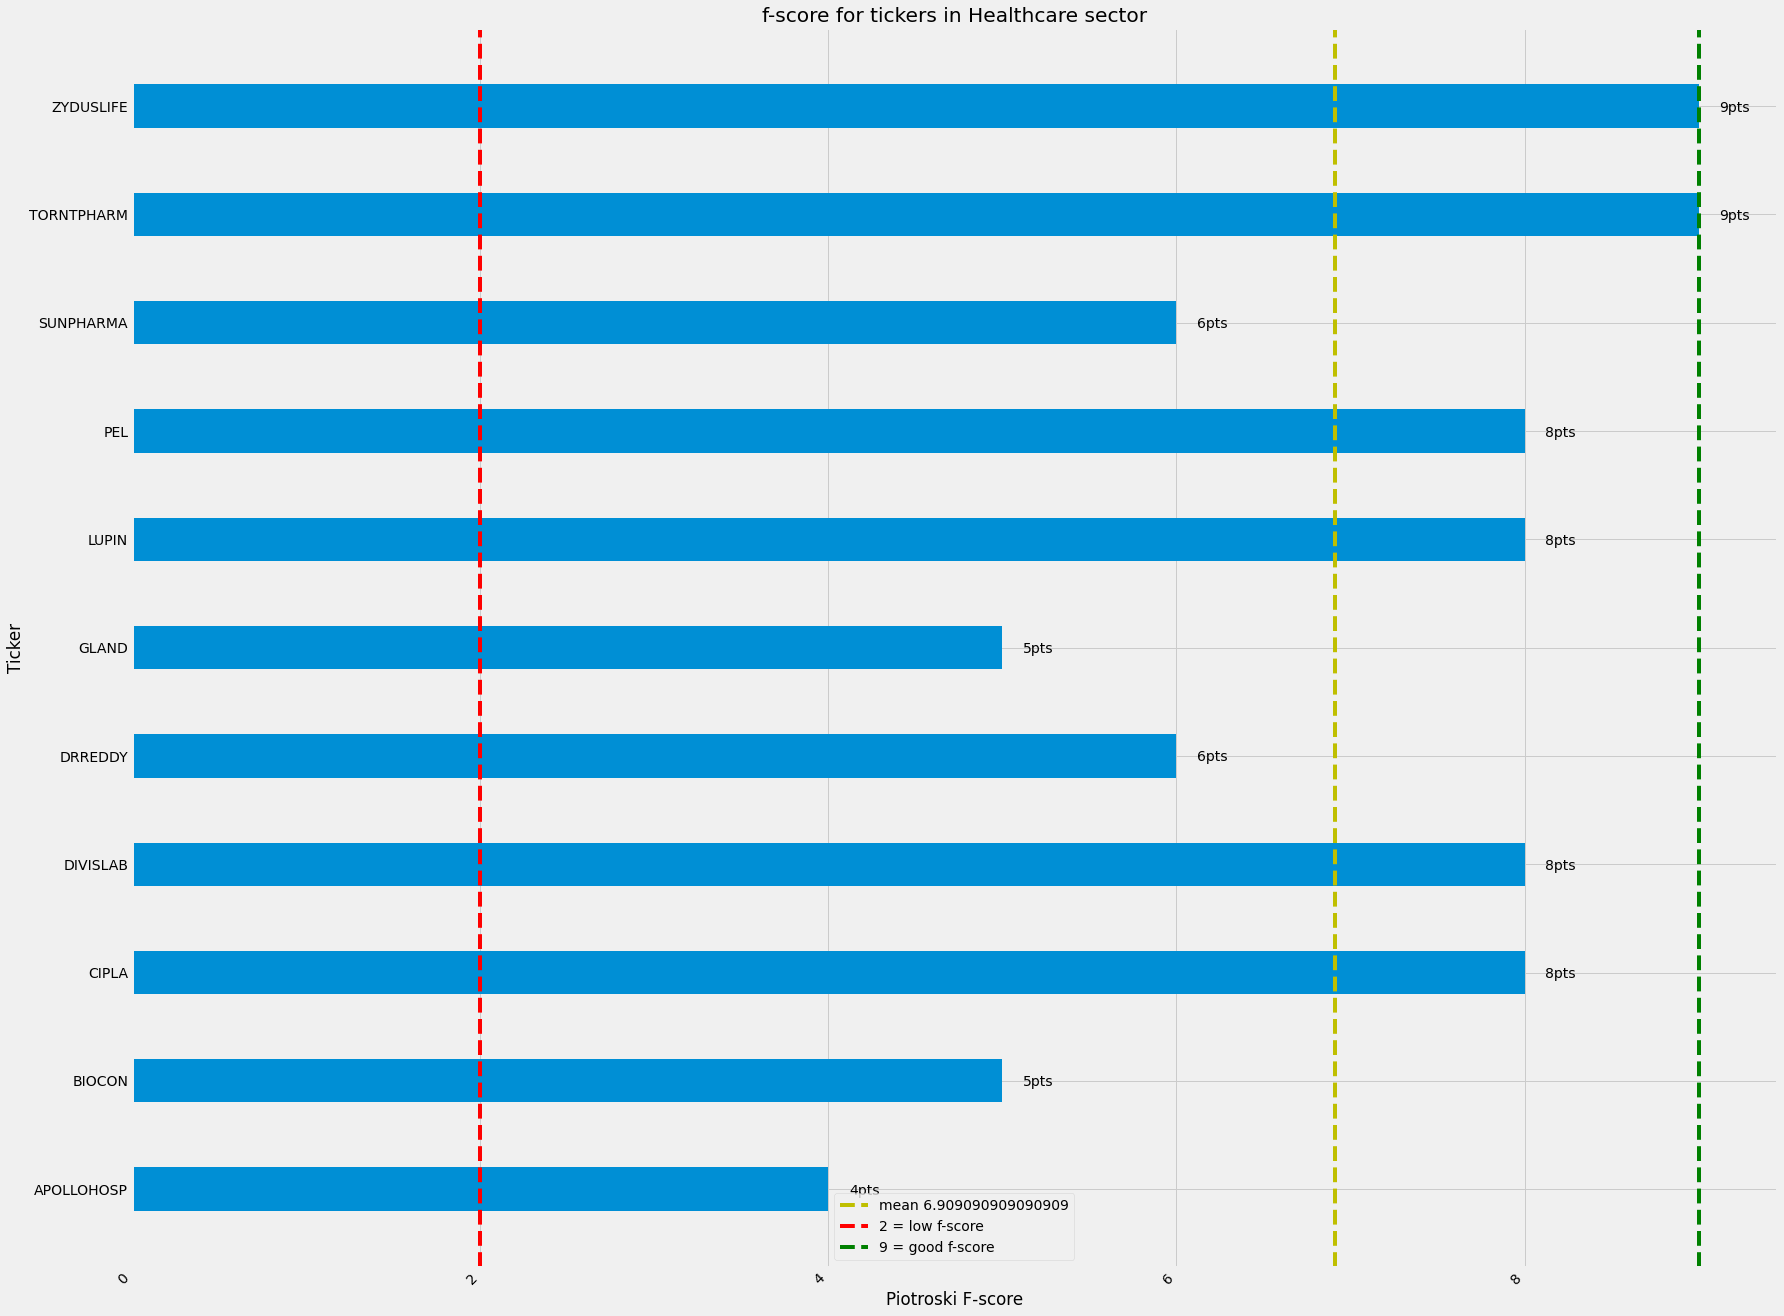

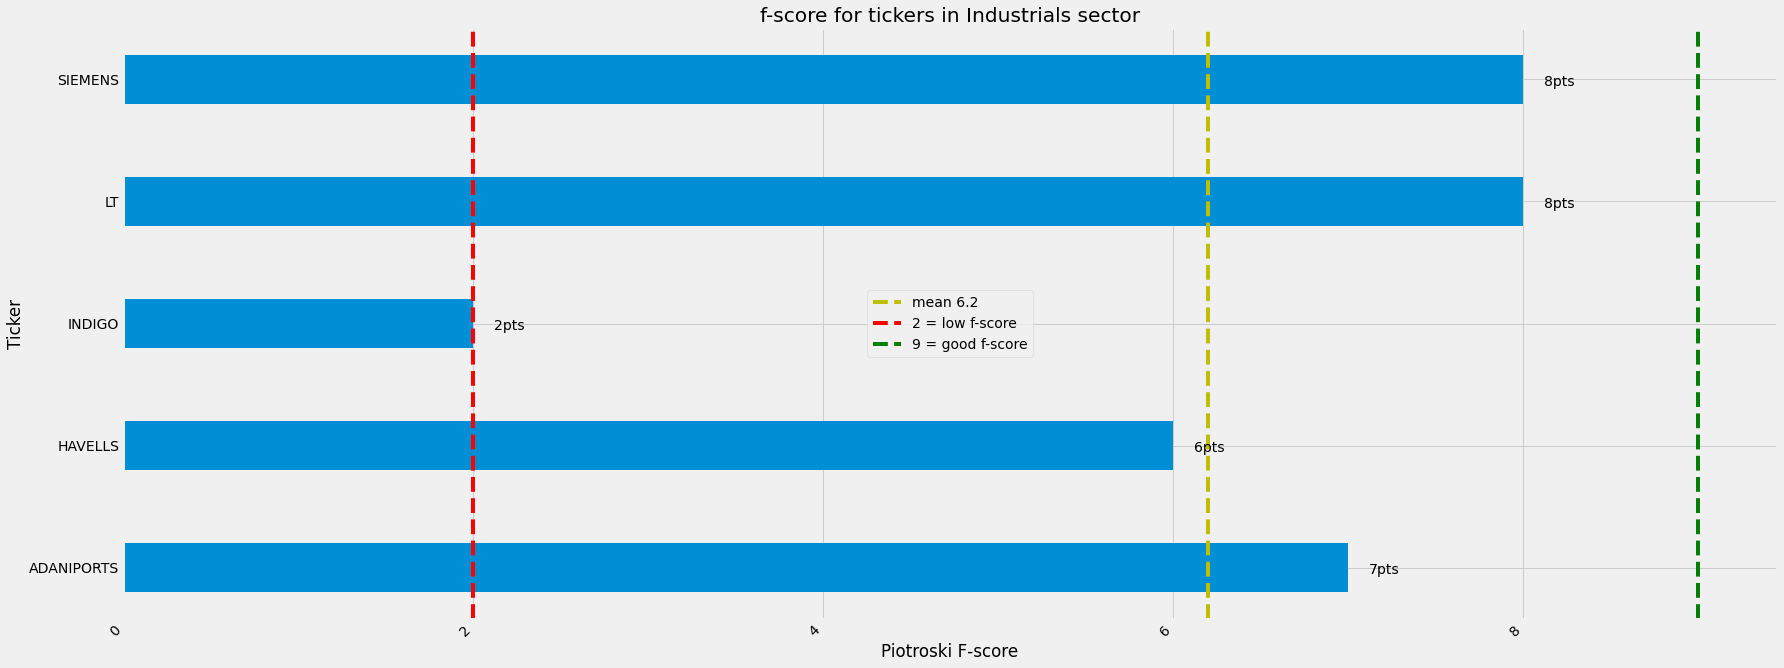

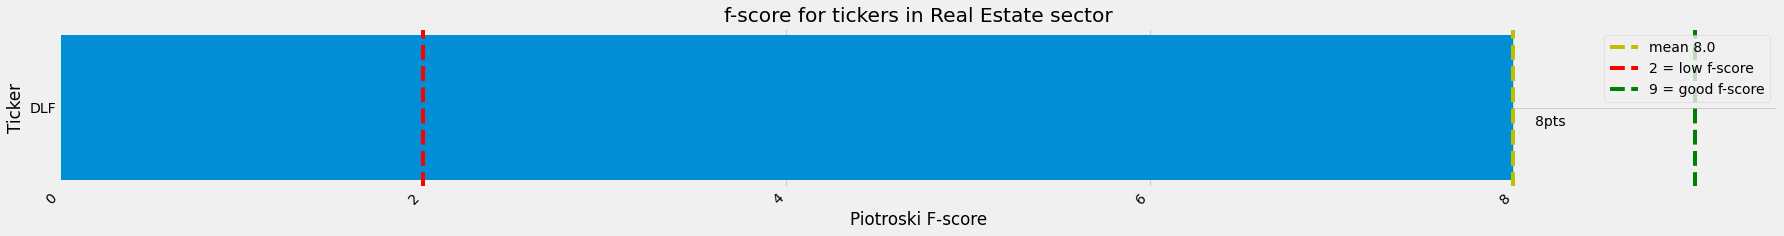

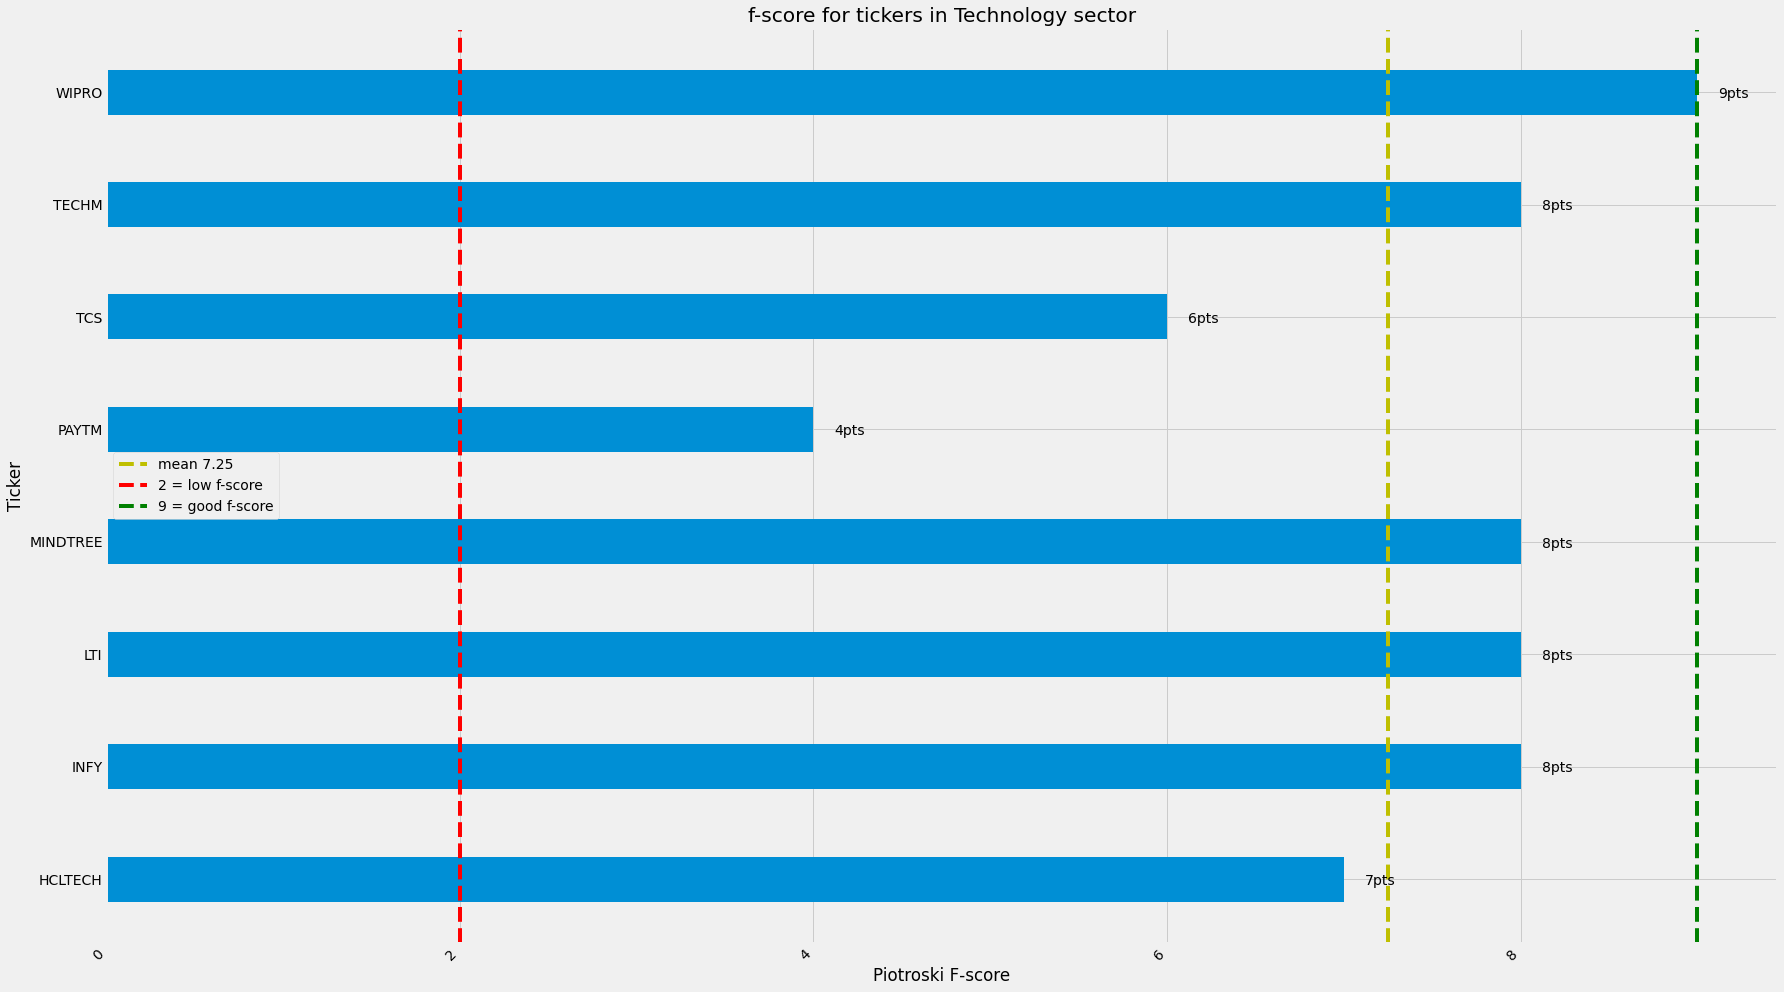

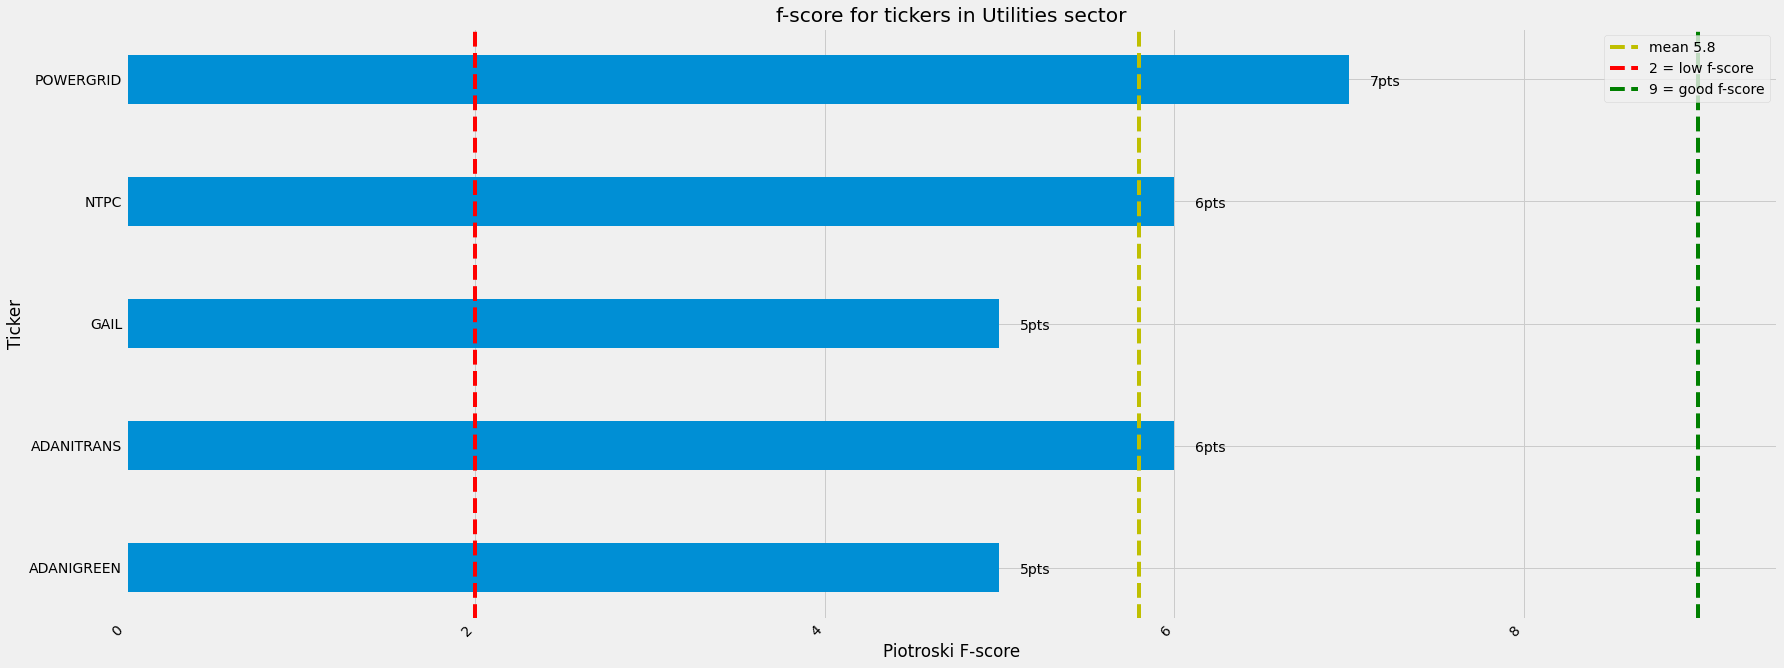

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


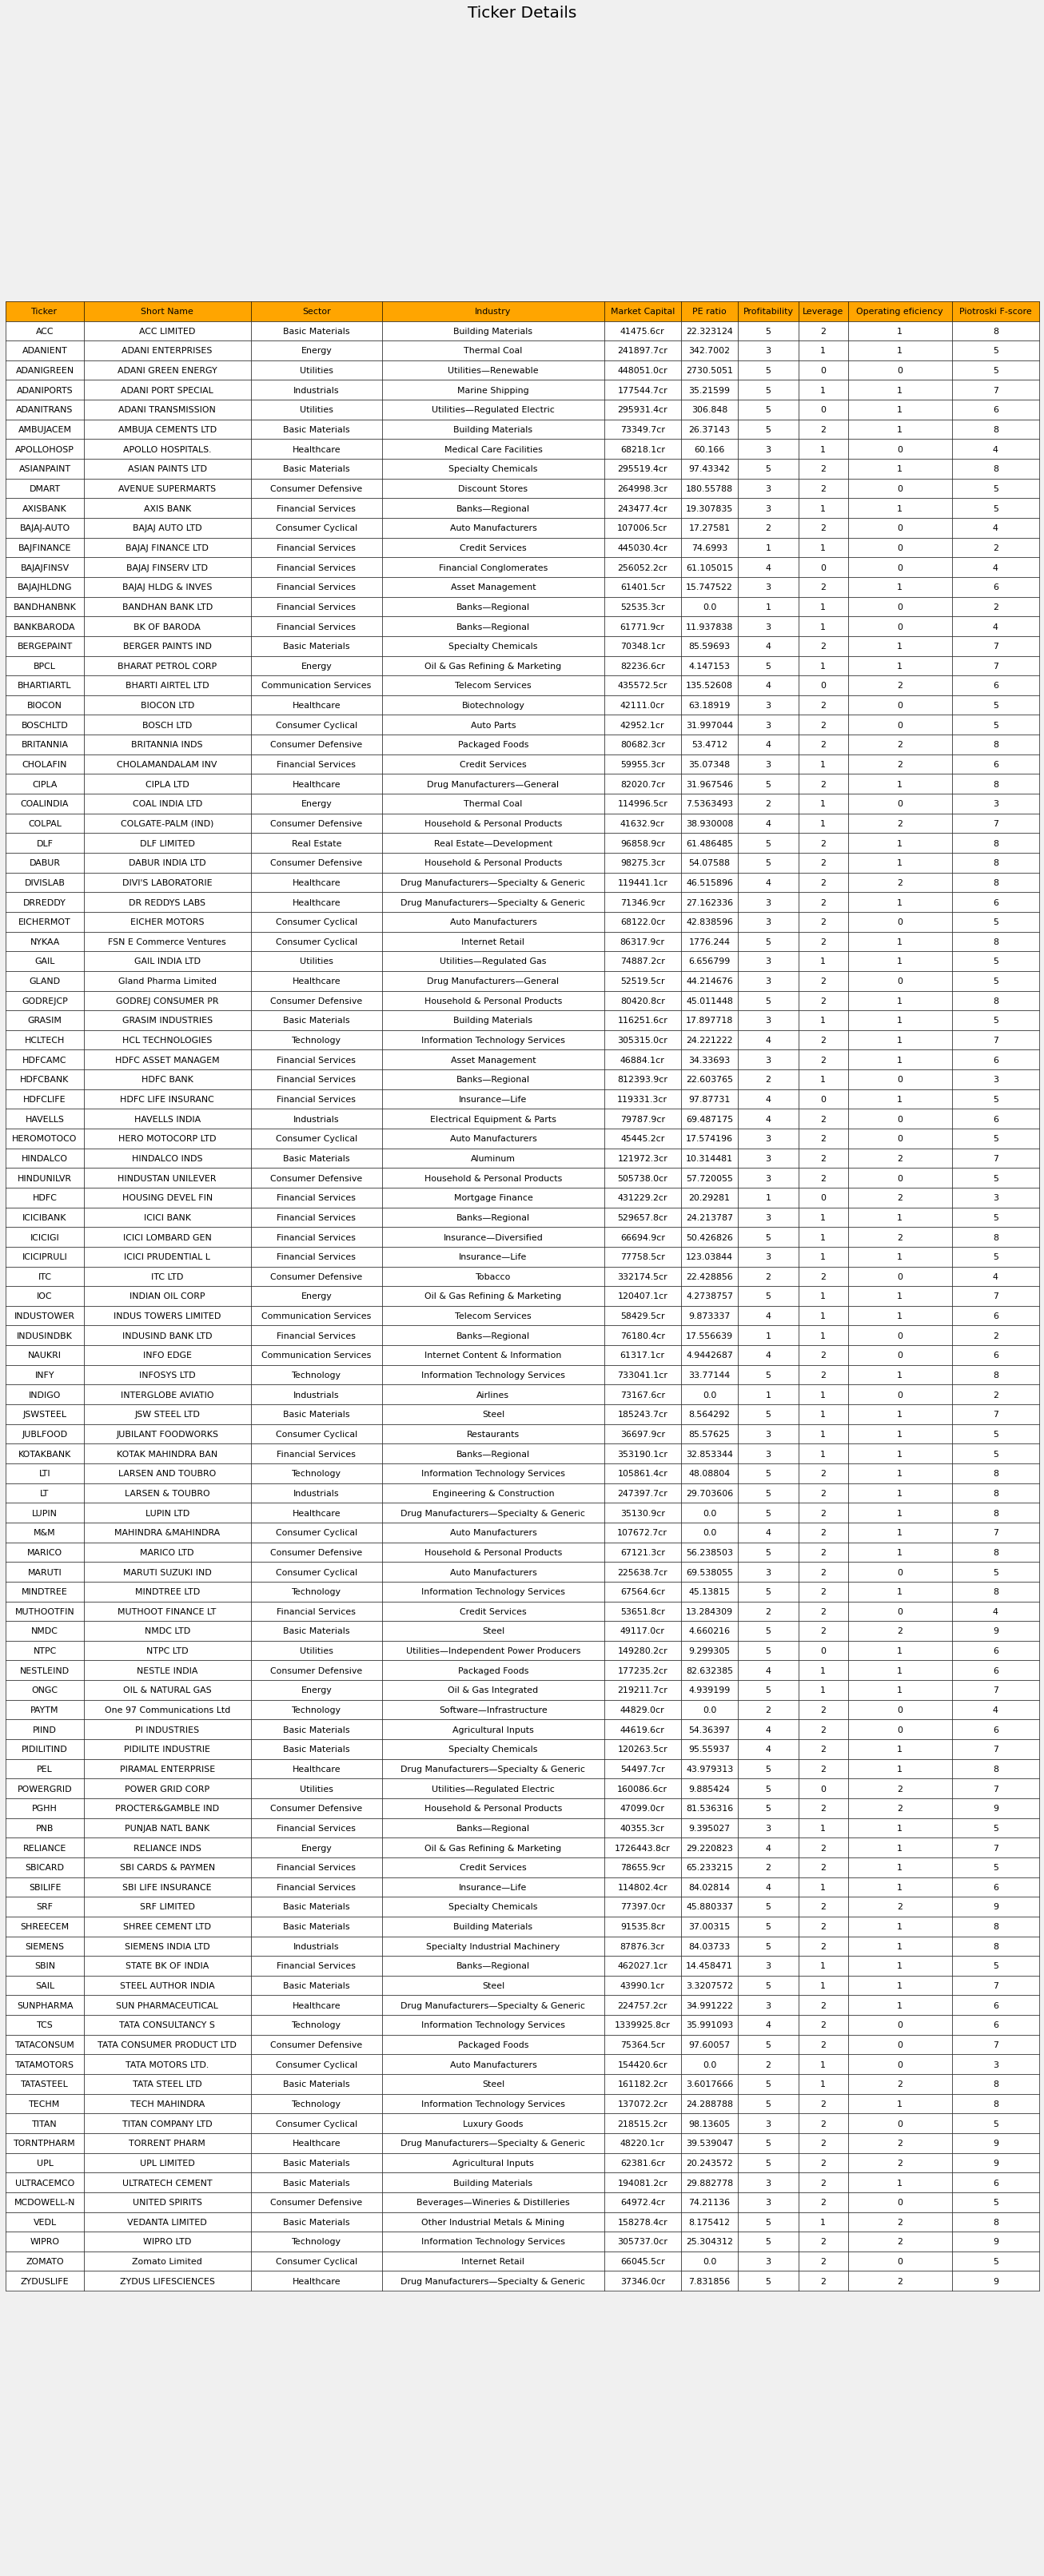

In [30]:
process(df=ldf, filename="large_cap.pdf")

In [31]:
process(df=adf, filename="all_cap.pdf")

Output hidden; open in https://colab.research.google.com to view.